In [1]:
import pandas
import pandas as pd
from statsmodels.tsa.x13 import x13_arima_analysis

quarterly_data = pd.read_excel('gdp.xlsx', index_col = 0).T.iloc[:,0]

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
quarterly_data

2000.1/4    1.9
2000.2/4    1.3
2000.3/4    2.8
2000.4/4   -0.3
2001.1/4    1.2
           ... 
2022.1/4    0.7
2022.2/4    0.8
2022.3/4    0.2
2022.4/4   -0.3
2023.1/4    0.3
Name: 　　　　　　국내총생산(GDP)(실질, 계절조정, 전기비), Length: 93, dtype: float64

In [3]:
quarterly_data.index = pd.date_range(start = '2000-01-01', end = '2023-04-01', freq = 'Q')

In [4]:
quarterly_data

2000-03-31    1.9
2000-06-30    1.3
2000-09-30    2.8
2000-12-31   -0.3
2001-03-31    1.2
             ... 
2022-03-31    0.7
2022-06-30    0.8
2022-09-30    0.2
2022-12-31   -0.3
2023-03-31    0.3
Freq: Q-DEC, Name: 　　　　　　국내총생산(GDP)(실질, 계절조정, 전기비), Length: 93, dtype: float64

In [5]:
quart = pd.DataFrame(quarterly_data, index = pd.date_range(start = '2000-01-01', end = '2023-04-01', freq = 'M'))
quart = quart.bfill()
quart

,"국내총생산(GDP)(실질, 계절조정, 전기비)"
2000-01-31,1.9
2000-02-29,1.9
2000-03-31,1.9
2000-04-30,1.3
2000-05-31,1.3
...,...
2022-11-30,-0.3
2022-12-31,-0.3
2023-01-31,0.3
2023-02-28,0.3


In [6]:
#monthly_data = quart.reset_index(level=[0, 1], drop=True).sort_index()

#onthly_data['Date'] = pd.to_datetime(monthly_data['Year'].astype(str) + '-' + monthly_data['Quarter'].astype(str).str[-1] + '-1')
#monthly_data = monthly_data.set_index('Date')['GDP Growth Rate']

# Perform X-13-ARIMA-SEATS analysis
#results = x13_arima_analysis(monthly_data)

#seasonally_adjusted_data

In [7]:
#results = x13_arima_analysis(quart)

In [8]:
feature = pd.read_excel('macroeconomics.xlsx', index_col = 0).T

In [9]:
feature

업종별,도소매업생산지수,음식숙박업생산지수,금융보험생산지수,부동산및임대업생산지수,운수보관생산지수,정보통신업,보건및사회복지업생산지수,사업서비스업생산지수,광공업생산지수,건설업생산지수,수신,여신,실업률,여수신,경상수지,자본수지,금융계정,오차및누락
2000.01 월,66.3,106.2,27.4,78.3,64.5,42.0,35.8,48.4,NaN,NaN,377917.4,256737.6,5.7,121179.8,-218.1,-7.9,-734.3,-508.3
2000.02 월,63.3,97.5,29.2,86.6,59.4,42.3,31.9,47.2,NaN,NaN,396819.9,259581.8,5.7,137238.1,-324.1,0.9,683.0,1006.2
2000.03 월,69.5,101.9,31.6,112.3,65.9,45.5,32.3,58.1,NaN,NaN,403507.2,266964.5,5.1,136542.7,275.3,1.0,-402.7,-679.0
2000.04 월,68.4,102.5,27.3,129.2,65.5,43.5,33.4,52.6,NaN,NaN,413323.2,277224.1,4.5,136099.1,-1156.0,0.6,-45.3,1110.1
2000.05 월,69.7,104.5,28.9,131.8,66.9,46.0,33.9,63.1,NaN,NaN,420731.8,285120.7,4.1,135611.1,1535.5,0.0,789.8,-745.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023.01 월,107.0,114.2,123.5,128.2,124.1,102.0,117.0,105.1,-13.4,3.6,2409497.3,2168698.3,3.6,240799.0,-4212.3,10.7,-623.6,3578.0
2023.02 월,101.0,113.2,120.1,129.4,121.3,101.0,117.2,105.5,-8.2,19.5,2431119.7,2170233.0,3.1,260886.7,-518.4,-0.6,1194.6,1713.6
2023.03 월,112.0,119.9,129.1,132.6,131.5,110.7,114.8,109.4,-7.6,12.1,2434789.7,2171145.4,2.9,263644.3,158.1,-37.8,-1435.3,-1555.6
2023.04 월,105.3,119.6,129.1,132.8,130.6,104.4,116.5,108.7,-9.0,12.3,2411502.1,2177578.1,2.8,233924.0,-792.6,-52.5,-4820.5,-3975.3


In [10]:
feature.index = pd.date_range(start = '2000-01-01', end = '2023-06-01', freq = 'M')

In [11]:
import numpy as np
rate = feature.drop(['광공업생산지수','건설업생산지수','경상수지','자본수지','금융계정','오차및누락'], axis = 1).pct_change(12)

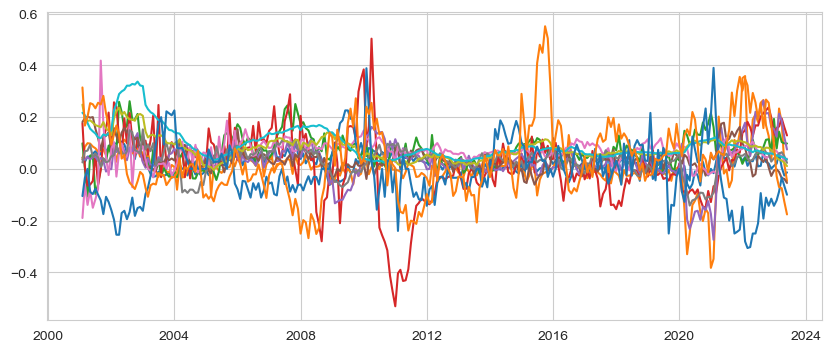

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))
plt.plot(rate)

In [13]:
rate

업종별,도소매업생산지수,음식숙박업생산지수,금융보험생산지수,부동산및임대업생산지수,운수보관생산지수,정보통신업,보건및사회복지업생산지수,사업서비스업생산지수,수신,여신,실업률,여수신
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.020019,0.084520,0.078603,0.158085,0.124094,-0.001957,0.068493,0.046813,0.043138,0.051684,-0.121951,-0.027996
2023-02-28,0.060924,0.233115,0.143810,0.163669,0.213000,-0.011742,0.053957,0.058175,0.035709,0.050110,-0.088235,-0.070342
2023-03-31,0.005386,0.178958,0.103419,0.194595,0.185753,-0.035714,0.050320,0.064202,0.031981,0.046673,-0.033333,-0.074954
2023-04-30,-0.025902,0.017872,0.098723,0.160839,0.122958,-0.038674,0.030062,0.049228,0.023873,0.043207,-0.066667,-0.126775


In [14]:
rate[['광공업생산지수','건설업생산지수']] = feature[['광공업생산지수','건설업생산지수']] * 0.01

In [15]:
rate = rate.dropna()
rate

업종별,도소매업생산지수,음식숙박업생산지수,금융보험생산지수,부동산및임대업생산지수,운수보관생산지수,정보통신업,보건및사회복지업생산지수,사업서비스업생산지수,수신,여신,실업률,여수신,광공업생산지수,건설업생산지수
2001-01-31,0.043741,0.036723,0.098540,0.176245,0.035659,0.180952,-0.189944,0.024793,0.248170,0.216843,-0.105263,0.314540,-0.042,0.062
2001-02-28,0.026856,0.085128,0.003425,0.008083,0.035354,0.196217,-0.059561,0.067797,0.193031,0.206761,-0.035088,0.167061,0.055,0.097
2001-03-31,0.047482,0.099117,-0.107595,-0.065004,0.045524,0.202198,-0.139319,0.070568,0.185069,0.176823,0.000000,0.201193,0.015,0.028
2001-04-30,0.046784,0.097561,0.051282,-0.061146,0.036641,0.197701,-0.083832,0.093156,0.187747,0.155242,-0.088889,0.253957,0.045,0.058
2001-05-31,0.058824,0.086124,0.051903,-0.047041,0.044843,0.200000,-0.150442,0.044374,0.178672,0.145010,-0.097561,0.249448,0.017,0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.020019,0.084520,0.078603,0.158085,0.124094,-0.001957,0.068493,0.046813,0.043138,0.051684,-0.121951,-0.027996,-0.134,0.036
2023-02-28,0.060924,0.233115,0.143810,0.163669,0.213000,-0.011742,0.053957,0.058175,0.035709,0.050110,-0.088235,-0.070342,-0.082,0.195
2023-03-31,0.005386,0.178958,0.103419,0.194595,0.185753,-0.035714,0.050320,0.064202,0.031981,0.046673,-0.033333,-0.074954,-0.076,0.121
2023-04-30,-0.025902,0.017872,0.098723,0.160839,0.122958,-0.038674,0.030062,0.049228,0.023873,0.043207,-0.066667,-0.126775,-0.090,0.123


In [16]:
import yfinance as yf

stock_code = "^KS11"
kospi = yf.download(stock_code, start="2000-01-01", end="2023-06-01")
kospi = kospi['Adj Close'].resample('M').last()
kospi.index = pd.date_range(start = '2000-01-01', end = '2023-06-01', freq = 'M')
kospi = np.log(kospi) - np.log(kospi.shift(12))
kospi

[*********************100%***********************]  1 of 1 completed


2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30         NaN
2000-05-31         NaN
                ...   
2023-01-31   -0.093716
2023-02-28   -0.112139
2023-03-31   -0.107387
2023-04-30   -0.074514
2023-05-31   -0.041343
Freq: M, Name: Adj Close, Length: 281, dtype: float64

In [17]:
rate['KOSPI'] = kospi.iloc[12:]

/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_38516/1619494198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate['KOSPI'] = kospi.iloc[12:]


In [18]:
interest = pd.read_excel('interest.xlsx', index_col = 0).T * 0.01
interest.index = pd.date_range(start = '2000-01-01', end = '2023-06-01', freq = 'M')
interest

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


계정항목별,대출평균 1) (연%)
2000-01-31,0.0859
2000-02-29,0.0864
2000-03-31,0.0879
2000-04-30,0.0861
2000-05-31,0.0862
...,...
2023-01-31,0.0546
2023-02-28,0.0532
2023-03-31,0.0517
2023-04-30,0.0501


In [19]:
rate['interest'] = interest.iloc[12:]

/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_38516/2933591756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate['interest'] = interest.iloc[12:]


In [20]:
rate['gdpRate'] = (quart * 0.01).iloc[12:]

/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_38516/4114480605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate['gdpRate'] = (quart * 0.01).iloc[12:]


In [21]:
label = pd.read_csv("Labeling.csv", index_col = 0).iloc[60:]
label

,CPI,export,import,label
2000-01-31,0.019,0.314,0.460,1.0
2000-02-29,0.018,0.358,0.575,1.0
2000-03-31,0.021,0.238,0.527,1.0
2000-04-30,0.014,0.176,0.466,1.0
2000-05-31,0.011,0.281,0.405,1.0
...,...,...,...,...
2023-01-31,0.052,-0.164,-0.028,3.0
2023-02-28,0.048,-0.077,0.035,0.0
2023-03-31,0.042,-0.138,-0.065,3.0
2023-04-30,0.037,-0.144,-0.133,2.0


In [22]:
label.index = pd.date_range(start = '2000-01-01', end = '2023-06-01', freq = 'M')

In [23]:
rate = pd.concat([rate, label], axis = 1)
rate

,도소매업생산지수,음식숙박업생산지수,금융보험생산지수,부동산및임대업생산지수,운수보관생산지수,정보통신업,보건및사회복지업생산지수,사업서비스업생산지수,수신,여신,...,여수신,광공업생산지수,건설업생산지수,KOSPI,interest,gdpRate,CPI,export,import,label
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019,0.314,0.460,1.0
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.018,0.358,0.575,1.0
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.021,0.238,0.527,1.0
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.014,0.176,0.466,1.0
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.011,0.281,0.405,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.020019,0.084520,0.078603,0.158085,0.124094,-0.001957,0.068493,0.046813,0.043138,0.051684,...,-0.027996,-0.134,0.036,-0.093716,0.0546,0.003,0.052,-0.164,-0.028,3.0
2023-02-28,0.060924,0.233115,0.143810,0.163669,0.213000,-0.011742,0.053957,0.058175,0.035709,0.050110,...,-0.070342,-0.082,0.195,-0.112139,0.0532,0.003,0.048,-0.077,0.035,0.0
2023-03-31,0.005386,0.178958,0.103419,0.194595,0.185753,-0.035714,0.050320,0.064202,0.031981,0.046673,...,-0.074954,-0.076,0.121,-0.107387,0.0517,0.003,0.042,-0.138,-0.065,3.0
2023-04-30,-0.025902,0.017872,0.098723,0.160839,0.122958,-0.038674,0.030062,0.049228,0.023873,0.043207,...,-0.126775,-0.090,0.123,-0.074514,0.0501,NaN,0.037,-0.144,-0.133,2.0


In [24]:
import statsmodels.api as sm

test = rate.dropna().drop(['수신','여신','정보통신업','보건및사회복지업생산지수','부동산및임대업생산지수','광공업생산지수'], axis = 1)
X = test.drop(['gdpRate','label'], axis = 1)
y = test['gdpRate']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gdpRate   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     14.42
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.87e-24
Time:                        14:18:15   Log-Likelihood:                 942.93
No. Observations:                 267   AIC:                            -1858.
Df Residuals:                     253   BIC:                            -1808.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.002      1.608      0.109      -0.001       0.007
도소매업생산지수       0.0642      0.020      3.211      0.001       0.025       0.103
음식숙박업생산지수      0.0244      0.010      2.416      0.016       0.005       0.044
금융보험생산지수      -0.0173      0.008     -2.103      0.036      -0.034      -0.001
운수보관생산지수      -0.0298      0.012     -2.400      0.017      -0.054      -0.005
사업서비스업생산지수     0.0367      0.012      2.977      0.003       0.012       0.061
실업률            0.0168      0.005      3.275      0.001       0.007       0.027
여수신            0.0050      0.004      1.311      0.191      -0.002       0.012
건설업생산지수        0.0130      0.006      2.346      0.020       0.002       0.024
KOSPI          0.0215      0.003      7.112      0.000       0.016       0.027
interest       0.0424      0.051      0.826      0.410      -0.059       0.144
CPI            0.0663      0.059      1.131      0.259      -0.049       0.182
export         0.0081      0.008      1.038      0.300      -0.007       0.024
import        -0.0122      0.007     -1.689      0.092      -0.026       0.002
==============================================================================
Omnibus:                       56.736   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.678
Skew:                          -0.882   Prob(JB):                     7.90e-41
Kurtosis:                       6.672   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


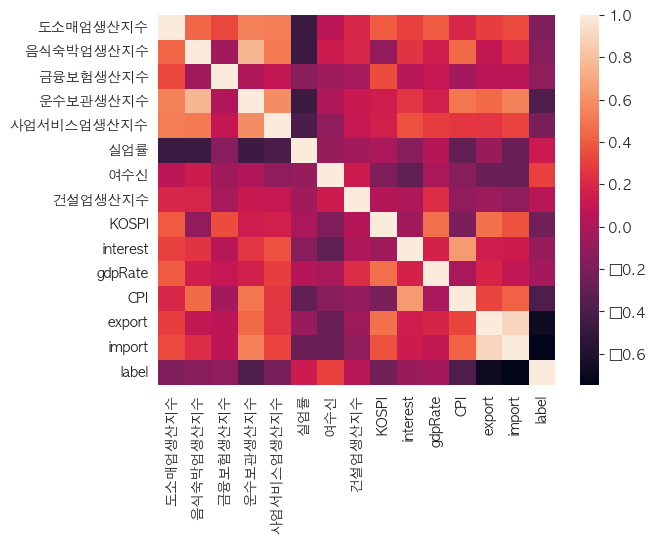

In [26]:
import seaborn as sns
from matplotlib import font_manager, rc

rc('font', family = 'AppleGothic')
sns.heatmap(test.corr())

In [27]:
test.corr()

,도소매업생산지수,음식숙박업생산지수,금융보험생산지수,운수보관생산지수,사업서비스업생산지수,실업률,여수신,건설업생산지수,KOSPI,interest,gdpRate,CPI,export,import,label
도소매업생산지수,1.000000,0.437793,0.329604,0.538124,0.527142,-0.473163,0.059802,0.199056,0.397586,0.298294,0.405643,0.201679,0.295218,0.332406,-0.180084
음식숙박업생산지수,0.437793,1.000000,-0.047223,0.754663,0.511153,-0.475092,0.128844,0.191712,-0.104677,0.255171,0.149367,0.456319,0.090747,0.223625,-0.147553
금융보험생산지수,0.329604,-0.047223,1.000000,0.017398,0.090371,-0.150518,-0.049897,-0.025169,0.347248,0.038989,0.096980,-0.033856,0.062575,0.065871,-0.111701
운수보관생산지수,0.538124,0.754663,0.017398,1.000000,0.588674,-0.458619,0.013197,0.120143,0.139458,0.257865,0.160143,0.502195,0.454029,0.542082,-0.389559
사업서비스업생산지수,0.527142,0.511153,0.090371,0.588674,1.000000,-0.395634,-0.116178,0.106449,0.158693,0.364521,0.297940,0.263888,0.257294,0.315079,-0.208210
실업률,-0.473163,-0.475092,-0.150518,-0.458619,-0.395634,1.000000,-0.084529,-0.043703,-0.004920,-0.156732,0.036599,-0.302209,-0.080965,-0.268134,0.122285
여수신,0.059802,0.128844,-0.049897,0.013197,-0.116178,-0.084529,1.000000,0.131436,-0.184812,-0.310417,-0.004074,-0.146418,-0.269628,-0.276245,0.306229
건설업생산지수,0.199056,0.191712,-0.025169,0.120143,0.106449,-0.043703,0.131436,1.000000,0.027557,0.009970,0.229265,-0.110856,-0.052442,-0.112920,0.049292
KOSPI,0.397586,-0.104677,0.347248,0.139458,0.158693,-0.004920,-0.184812,0.027557,1.000000,-0.057239,0.474132,-0.200410,0.475840,0.368029,-0.234837
interest,0.298294,0.255171,0.038989,0.257865,0.364521,-0.156732,-0.310417,0.009970,-0.057239,1.000000,0.168621,0.638952,0.147526,0.132759,-0.082106


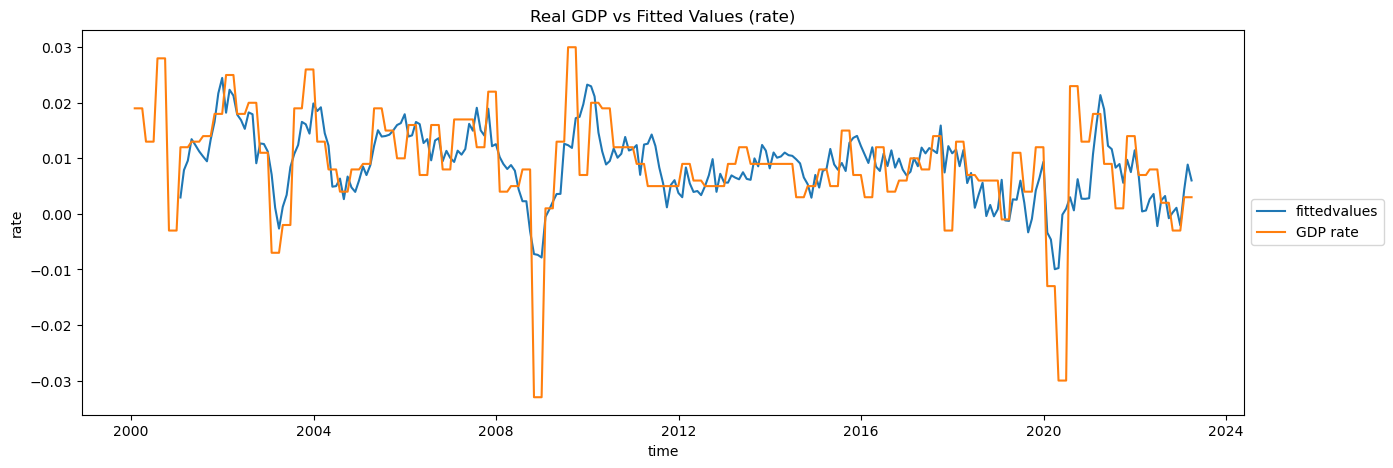

In [28]:
plt.rcdefaults()
plt.figure(figsize = (15,5))
plt.plot(results.fittedvalues, label = 'fittedvalues')
plt.plot(quart*0.01, label = 'GDP rate')
plt.xlabel('time')
plt.ylabel('rate')
plt.title('Real GDP vs Fitted Values (rate)')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

Text(0.5, 1.0, 'Real GDP vs Fitted Values')

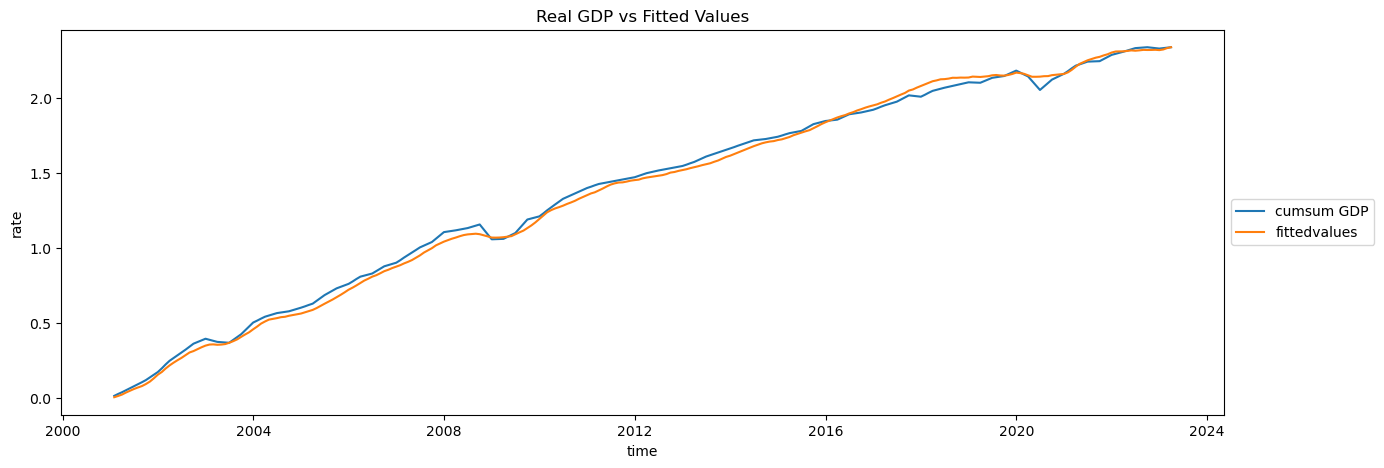

In [29]:
plt.figure(figsize = (15,5))
plt.plot((quart.iloc[12:]*0.01).cumsum(), label = 'cumsum GDP')
plt.plot(results.fittedvalues.cumsum(), label = 'fittedvalues')
plt.xlabel('time')
plt.ylabel('rate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Real GDP vs Fitted Values')

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test = rate.dropna().drop(['수신','여신'], axis = 1)
X = test.drop(['gdpRate','label'], axis = 1)
y = test['gdpRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

model = RandomForestRegressor(n_estimators = 1000,
                              random_state = 42,
                              criterion = 'absolute_error',
                              bootstrap = False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test MSE: {mse:.3f}')
print(f'Test MSE: {mae:.3f}')

Test MSE: 0.000
Test MSE: 0.009


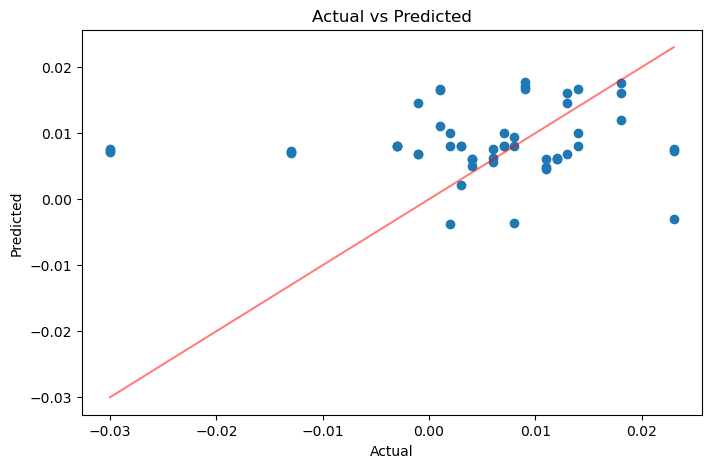

In [31]:
predictions = model.predict(X_test)
plt.rcdefaults()
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', alpha = 0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

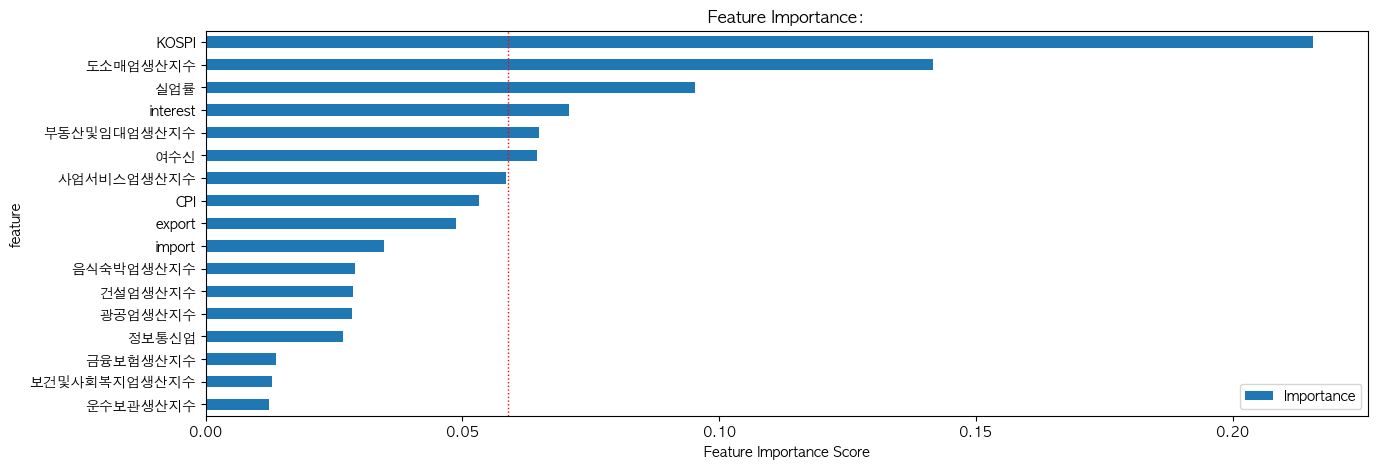

In [32]:
title = 'Feature Importance:'
figsize = (15, 5)

feat_imp = pd.DataFrame({'Importance':model.feature_importances_})
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)
feat_imp = feat_imp

rc('font', family = 'AppleGothic')
feat_imp.sort_values(by='Importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title=title, figsize=figsize)
plt.axvline(1. / feat_imp.shape[0], linewidth = 1, color='r', linestyle='dotted')
plt.xlabel('Feature Importance Score')
plt.show()

In [33]:
pred_y = pd.DataFrame(predictions, index = y_test.index)
ytrain = pd.DataFrame(y_train, index = y_train.index)

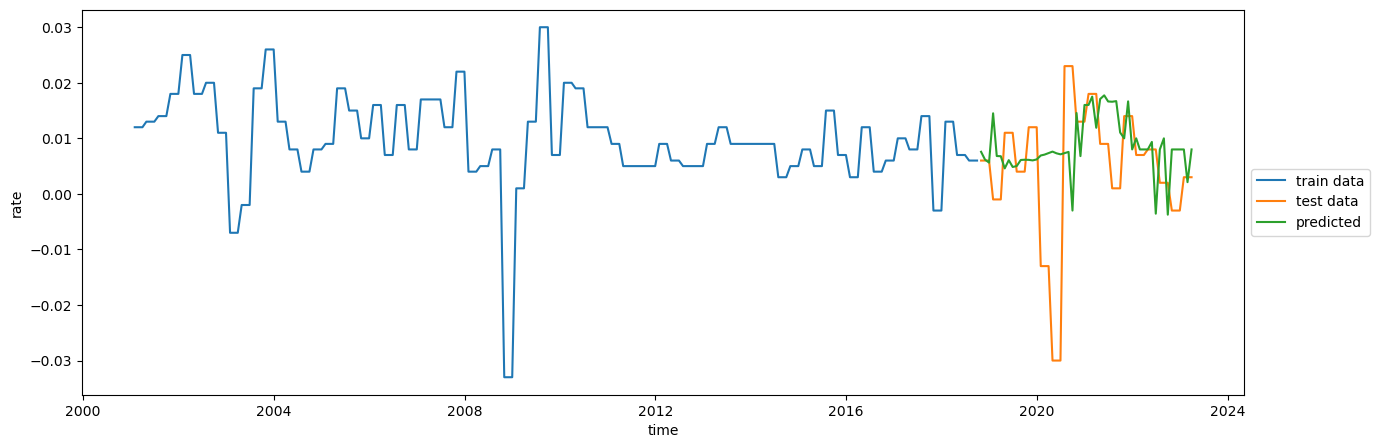

In [34]:
plt.rcdefaults()
plt.figure(figsize=(15,5))
plt.plot(ytrain, label = 'train data')
plt.plot(y_test, label = 'test data')
plt.plot(pred_y, label = 'predicted')
plt.xlabel('time')
plt.ylabel('rate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [35]:
pred_y

,0
2018-10-31,0.007576
2018-11-30,0.006171
2018-12-31,0.005635
2019-01-31,0.014506
2019-02-28,0.006817
2019-03-31,0.006780
2019-04-30,0.004586
2019-05-31,0.006072
2019-06-30,0.004846
2019-07-31,0.005010


Text(0.5, 1.0, 'Real GDP vs Fitted Values (rate)')

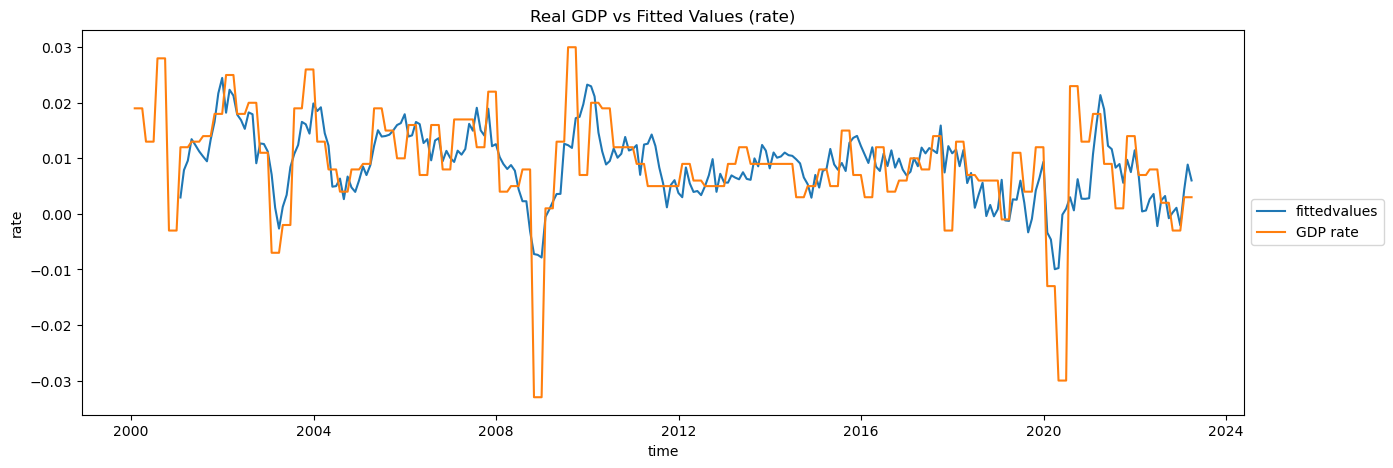

In [36]:
plt.rcdefaults()
plt.figure(figsize = (15,5))
plt.plot(results.fittedvalues, label = 'fittedvalues')
plt.plot(quart*0.01, label = 'GDP rate')
plt.xlabel('time')
plt.ylabel('rate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Real GDP vs Fitted Values (rate)')

### Classification

Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test = rate.dropna().drop(['수신','여신','export','import'], axis = 1)
X = test.drop(['gdpRate','label'], axis = 1)
y = test['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

clf = RandomForestClassifier(n_estimators = 1000, criterion = "entropy", bootstrap = True,
                             class_weight = 'balanced_subsample', oob_score = False, random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7407407407407407


In [38]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names = ['expansion','peak','contraction','recovery'])
print(report)

              precision    recall  f1-score   support

   expansion       0.67      0.40      0.50        10
        peak       0.94      0.76      0.84        21
 contraction       0.76      0.95      0.84        20
    recovery       0.17      0.33      0.22         3

    accuracy                           0.74        54
   macro avg       0.63      0.61      0.60        54
weighted avg       0.78      0.74      0.75        54



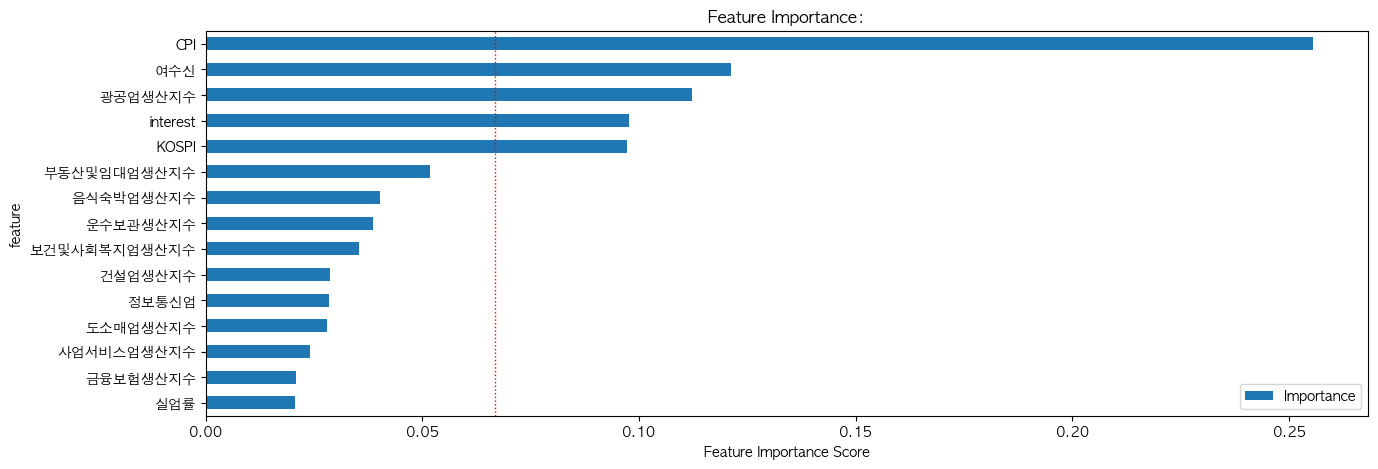

In [39]:
title = 'Feature Importance:'
figsize = (15, 5)

feat_imp = pd.DataFrame({'Importance':clf.feature_importances_})
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)
feat_imp = feat_imp

rc('font', family = 'AppleGothic')
feat_imp.sort_values(by='Importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title=title, figsize=figsize)
plt.axvline(1. / feat_imp.shape[0], linewidth = 1, color='r', linestyle='dotted')
plt.xlabel('Feature Importance Score')
plt.show()

Random Forest + Ensemble Model

In [40]:
from sklearn.ensemble import BaggingClassifier

n_estimator = 1000
rf2 = RandomForestClassifier(n_estimators = 1, criterion = 'entropy', bootstrap = False, class_weight = 'balanced_subsample')
bc2 = BaggingClassifier(base_estimator = rf2, n_estimators = n_estimator, random_state = 42)

fit = bc2.fit(X_train, y_train)
y_pred = fit.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7407407407407407


In [41]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names = ['expansion','peak','contraction','recovery'])
print(report)

              precision    recall  f1-score   support

   expansion       0.67      0.40      0.50        10
        peak       0.94      0.76      0.84        21
 contraction       0.76      0.95      0.84        20
    recovery       0.17      0.33      0.22         3

    accuracy                           0.74        54
   macro avg       0.63      0.61      0.60        54
weighted avg       0.78      0.74      0.75        54



Catboost Classifier

In [42]:
from catboost import CatBoostClassifier

In [43]:
from sklearn.utils.class_weight import compute_class_weight
n_estimator = 1000
classes = np.unique(y_train)
weights = compute_class_weight(class_weight = 'balanced', classes = classes, y = y_train)
class_weights = dict(zip(classes, weights))
cb = CatBoostClassifier(class_weights = class_weights,
                        n_estimators = n_estimator,
                        loss_function = 'MultiClass',
                        random_state = 42,
                        learning_rate = 0.003)
cb.fit(X_train, y_train)

y_pred_cb = cb.predict_proba(X_test)[:, 1]
y_pred = cb.predict(X_test)

0:	learn: 1.3832587	total: 64.6ms	remaining: 1m 4s
1:	learn: 1.3801668	total: 66.5ms	remaining: 33.2s
2:	learn: 1.3778754	total: 68.1ms	remaining: 22.6s
3:	learn: 1.3757700	total: 69.8ms	remaining: 17.4s
4:	learn: 1.3723859	total: 71.4ms	remaining: 14.2s
5:	learn: 1.3683109	total: 73ms	remaining: 12.1s
6:	learn: 1.3648987	total: 74.7ms	remaining: 10.6s
7:	learn: 1.3623346	total: 76.4ms	remaining: 9.47s
8:	learn: 1.3592308	total: 78ms	remaining: 8.59s
9:	learn: 1.3564467	total: 79.7ms	remaining: 7.89s
10:	learn: 1.3537343	total: 81.6ms	remaining: 7.34s
11:	learn: 1.3501588	total: 84ms	remaining: 6.91s
12:	learn: 1.3470741	total: 86ms	remaining: 6.53s
13:	learn: 1.3453237	total: 88.1ms	remaining: 6.2s
14:	learn: 1.3422458	total: 90ms	remaining: 5.91s
15:	learn: 1.3387953	total: 92.2ms	remaining: 5.67s
16:	learn: 1.3357802	total: 94.2ms	remaining: 5.44s
17:	learn: 1.3334924	total: 96.2ms	remaining: 5.25s
18:	learn: 1.3300742	total: 98.2ms	remaining: 5.07s
19:	learn: 1.3268458	total: 99.9m

In [44]:
print(classification_report(y_test, y_pred, target_names = ['expansion','peak','contraction','recovery']))

              precision    recall  f1-score   support

   expansion       0.33      0.10      0.15        10
        peak       0.94      0.71      0.81        21
 contraction       0.76      0.95      0.84        20
    recovery       0.10      0.33      0.15         3

    accuracy                           0.67        54
   macro avg       0.53      0.52      0.49        54
weighted avg       0.71      0.67      0.67        54



Random Forest 분류기를 사용한다

In [45]:
X_test

,도소매업생산지수,음식숙박업생산지수,금융보험생산지수,부동산및임대업생산지수,운수보관생산지수,정보통신업,보건및사회복지업생산지수,사업서비스업생산지수,실업률,여수신,광공업생산지수,건설업생산지수,KOSPI,interest,CPI
2018-10-31,0.054835,0.011447,0.094176,0.037567,0.060739,0.013115,0.097110,-0.002745,0.093750,0.021134,0.127,-0.017,-0.217736,0.0364,0.020
2018-11-30,0.005639,0.001641,-0.002342,0.004405,0.026886,-0.012500,0.101190,-0.017905,0.032258,-0.046266,0.003,-0.095,-0.166353,0.0366,0.020
2018-12-31,0.000000,0.005878,0.012911,-0.030075,0.008525,-0.012898,0.114150,0.014706,0.030303,-0.017596,0.007,-0.090,-0.189742,0.0372,0.013
2019-01-31,0.032000,0.012479,-0.003386,-0.005263,0.033363,0.050469,0.079275,0.005676,0.216216,-0.024884,-0.005,-0.062,-0.151868,0.0373,0.008
2019-02-28,-0.039153,-0.020646,0.001208,0.073516,0.007641,0.019699,0.076577,-0.017824,0.021739,-0.015829,-0.040,-0.087,-0.100422,0.0370,0.005
2019-03-31,-0.016713,-0.027620,0.018433,-0.023152,0.002613,0.008439,0.093642,-0.012856,-0.044444,0.038997,-0.021,-0.034,-0.133274,0.0366,0.004
2019-04-30,-0.008621,-0.008210,0.014925,-0.023050,-0.003428,0.039823,0.103488,0.025187,0.073171,0.031553,0.008,-0.048,-0.132336,0.0365,0.006
2019-05-31,0.012405,-0.003931,0.025172,-0.011733,-0.013356,0.063348,0.118743,0.023084,0.000000,0.036072,0.012,-0.014,-0.171208,0.0362,0.007
2019-06-30,-0.011639,-0.011419,-0.019318,-0.038904,-0.017766,0.000000,0.076670,0.030359,0.081081,0.050902,-0.019,-0.010,-0.087793,0.0349,0.007
2019-07-31,-0.005917,-0.023419,0.040936,-0.034759,0.000000,0.032859,0.072747,0.030986,0.054054,0.055399,0.020,-0.038,-0.125499,0.0340,0.006


In [46]:
y_pred = clf.predict(rate.drop(['수신','여신','gdpRate','export','import'], axis = 1).iloc[225:,:-1])
y_pred

array([1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 0., 0., 0., 3., 3., 3., 3., 3., 2., 3.,
       0., 0., 0., 1., 1.])

### 자산군 지정

KOSPI -> 나중에 high beta, momentum, Volatility로 나눌 것

In [47]:
import FinanceDataReader as fdr
KOSPI = fdr.DataReader('^KS11', '2000')
KOSPI = KOSPI['Close'].resample('M').last()
KOSPI.index = pd.date_range(start = '2000-01-01', end = '2023-08-01', freq = 'M')
KOSPI = np.log(KOSPI) - np.log(KOSPI.shift())
KOSPI = KOSPI.iloc[12:-2]

In [48]:
KOSPI

2001-01-31    0.202537
2001-02-28   -0.066596
2001-03-31   -0.099745
2001-04-30    0.098464
2001-05-31    0.058528
                ...   
2023-01-31    0.080997
2023-02-28   -0.005056
2023-03-31    0.026183
2023-04-30    0.009911
2023-05-31    0.029770
Freq: M, Name: Close, Length: 269, dtype: float64

In [49]:
df_krx = fdr.StockListing('KRX')
df_krx.to_csv('stock_list.csv')

In [50]:
import FinanceDataReader as fdr
def crawlStock(year : int = 2000, data_type : str = 'Close') -> pd.DataFrame :
    df_krx = fdr.StockListing('KRX')
    data = pd.DataFrame()
    j = 0
    for i in df_krx['Code'] :
        if i.isnumeric() : data = pd.concat([data, fdr.DataReader(i, str(year))[data_type].resample('M').last()], axis = 1)
        j += 1
        if j % 100 == 0 : print("progress : %.2f" %(j / len(df_krx['Code'])))
    data.columns = df_krx['Code'][df_krx['Code'].str.isnumeric()]
    return data

In [51]:
#data = crawlStock(2000)

In [52]:
data = pd.read_csv("stock_monthly.csv", index_col = 0)
data

,005930,373220,000660,207940,005935,006400,051910,005380,005490,000270,...,078650,245450,288490,000995,322190,308700,010145,004565,000547,001745
2000-01-31 00:00:00,5580,NaN,518222,NaN,3300,44500,NaN,17100,133000,6720,...,NaN,NaN,NaN,NaN,NaN,NaN,25236,2984,7768,152374
2000-02-29 00:00:00,5120,NaN,351370,NaN,2060,32900,NaN,12050,111500,4470,...,NaN,NaN,NaN,NaN,NaN,NaN,18703,2387,5605,105603
2000-03-31 00:00:00,6700,NaN,482888,NaN,3400,41000,NaN,13400,106500,5000,...,NaN,NaN,NaN,NaN,NaN,NaN,20895,2531,6293,111317
2000-04-30 00:00:00,6000,NaN,345481,NaN,2980,46300,NaN,10450,86800,5040,...,NaN,NaN,NaN,NaN,NaN,NaN,17763,2599,5202,99466
2000-05-31 00:00:00,6160,NaN,345481,NaN,2820,43000,NaN,12100,85000,6180,...,NaN,NaN,NaN,NaN,NaN,NaN,14497,2310,3924,108355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 00:00:00,64000,584000.0,88600,788000.0,53900,735000,712000.0,184500,368000,81000,...,2120.0,1700.0,49.0,125400.0,119.0,339.0,166000,46900,19100,51100
2023-04-30 00:00:00,65500,581000.0,89500,781000.0,55700,691000,740000.0,197500,377000,84500,...,2120.0,1780.0,62.0,86800.0,147.0,380.0,161000,50800,16840,53100
2023-05-31 00:00:00,71400,599000.0,108600,784000.0,58600,718000,693000.0,200000,360000,85900,...,2120.0,1795.0,57.0,75000.0,149.0,264.0,168500,51400,17240,50300
2023-06-30 00:00:00,72200,553000.0,115200,744000.0,59500,669000,667000.0,206500,388000,88500,...,2120.0,1599.0,49.0,30000.0,141.0,254.0,98600,19900,8050,23750


In [53]:
data = np.log(data) - np.log(data.shift())
data.index = pd.date_range(start = '2000-01-01', end = '2023-08-01', freq = 'M')
data

,005930,373220,000660,207940,005935,006400,051910,005380,005490,000270,...,078650,245450,288490,000995,322190,308700,010145,004565,000547,001745
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,-0.086034,NaN,-0.388564,NaN,-0.471216,-0.302017,NaN,-0.350014,-0.176325,-0.407700,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.299588,-0.223227,-0.326354,-0.366651
2000-03-31,0.268953,NaN,0.317945,NaN,0.501069,0.220099,NaN,0.106190,-0.045880,0.112050,...,NaN,NaN,NaN,NaN,NaN,NaN,0.110826,0.058577,0.115779,0.052695
2000-04-30,-0.110348,NaN,-0.334847,NaN,-0.131852,0.121570,NaN,-0.248653,-0.204538,0.007968,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.162392,0.026512,-0.190395,-0.112566
2000-05-31,0.026317,NaN,0.000000,NaN,-0.055186,-0.073942,NaN,0.146603,-0.020955,0.203912,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.203176,-0.117879,-0.281932,0.085597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.054588,0.110320,-0.008989,0.019219,0.009320,0.054521,0.045985,0.045462,0.146032,0.072969,...,0.000000,0.061250,-0.040005,0.273430,0.125163,-0.142707,-0.052798,-0.103226,-0.045544,0.023763
2023-04-30,0.023167,-0.005150,0.010107,-0.008923,0.032850,-0.061731,0.038572,0.068089,0.024162,0.042302,...,0.000000,0.045985,0.235314,-0.367902,0.211309,0.114171,-0.030583,0.079879,-0.125931,0.038392
2023-05-31,0.086248,0.030511,0.193433,0.003834,0.050755,0.038330,-0.065620,0.012579,-0.046141,0.016432,...,0.000000,0.008392,-0.084083,-0.146119,0.013514,-0.364222,0.045531,0.011742,0.023475,-0.054172
2023-06-30,0.011142,-0.079904,0.058998,-0.052368,0.015242,-0.070686,-0.038240,0.031983,0.074901,0.029819,...,0.000000,-0.115627,-0.151231,-0.916291,-0.055186,-0.038615,-0.535864,-0.948918,-0.761560,-0.750423


Stock High Momentum

In [54]:
temp1 = data**2
temp2 = data.copy()
variance6 = sum([temp1.shift(i, axis = 0) for i in range(6)]) / 6 - ((sum([temp2.shift(i, axis = 0) for i in range(6)])/6) ** 2)
variance6

,005930,373220,000660,207940,005935,006400,051910,005380,005490,000270,...,078650,245450,288490,000995,322190,308700,010145,004565,000547,001745
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.005892,0.028962,0.007223,0.002526,0.005662,0.024071,0.017415,0.005531,0.007967,0.010075,...,0.000000,0.005679,0.062080,0.058444,0.223817,0.016690,0.086480,0.004873,0.014539,0.033052
2023-04-30,0.004590,0.023860,0.007176,0.001029,0.003598,0.012048,0.015109,0.004604,0.007308,0.008037,...,0.000000,0.006251,0.073093,0.060603,0.239212,0.024061,0.086210,0.006228,0.012922,0.033498
2023-05-31,0.005213,0.022388,0.011793,0.000960,0.003642,0.012382,0.011820,0.004649,0.005819,0.008118,...,0.000000,0.006296,0.054729,0.061800,0.242692,0.028153,0.086725,0.006391,0.013128,0.030156
2023-06-30,0.001482,0.007025,0.006313,0.000574,0.001275,0.005455,0.004542,0.000772,0.003442,0.001681,...,0.000000,0.006969,0.058261,0.169383,0.011264,0.029329,0.103365,0.130257,0.091449,0.107943


In [55]:
sharpe = data/variance6
sharpe

,005930,373220,000660,207940,005935,006400,051910,005380,005490,000270,...,078650,245450,288490,000995,322190,308700,010145,004565,000547,001745
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,9.264138,3.809134,-1.244551,7.607466,1.646029,2.264982,2.640601,8.218933,18.330581,7.242713,...,NaN,10.784454,-0.644420,4.678493,0.559220,-8.550517,-0.610526,-21.181388,-3.132507,0.718968
2023-04-30,5.047637,-0.215852,1.408347,-8.673199,9.129262,-5.123537,2.552876,14.789374,3.306092,5.263191,...,NaN,7.356944,3.219386,-6.070642,0.883354,4.745063,-0.354757,12.825075,-9.745734,1.146110
2023-05-31,16.545528,1.362833,16.402665,3.993933,13.937328,3.095499,-5.551622,2.705412,-7.929635,2.024175,...,NaN,1.332826,-1.536341,-2.364361,0.055682,-12.937163,0.525009,1.837146,1.788234,-1.796391
2023-06-30,7.516150,-11.374105,9.345552,-91.174423,11.955243,-12.958783,-8.419948,41.410940,21.762763,17.742392,...,NaN,-16.591989,-2.595770,-5.409566,-4.899541,-1.316590,-5.184181,-7.284989,-8.327725,-6.952006


In [56]:
Idxs = pd.DataFrame()
for i in range(11, 282) :
    idx = pd.DataFrame(sharpe.iloc[i].sort_values(axis = 0, ascending = False).dropna().index[:10]).T
    Idxs = pd.concat([Idxs, idx], axis = 0)

Idxs.index = pd.date_range(start = '2001-01-01', end = '2023-08-01', freq = 'M')
Idxs

,0,1,2,3,4,5,6,7,8,9
2001-01-31,003300,017940,007310,018670,000215,033780,004430,000075,000860,013580
2001-02-28,003300,007310,000075,003850,007280,005030,006120,011780,015590,004840
2001-03-31,000860,008775,005030,007340,000075,000150,004370,004250,000490,008770
2001-04-30,008775,034300,003920,026960,001340,010060,007280,000590,000650,004990
2001-05-31,023910,008775,005440,005305,002355,007280,003650,010620,008290,004380
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,002600,122900,353060,104460,367360,388800,366330,418170,386580,424140
2023-04-30,001070,004890,012450,001045,101400,088910,011560,003100,141000,036190
2023-05-31,418210,400840,430460,003620,405640,427950,430700,377400,435380,393360
2023-06-30,353060,397880,418210,435380,415580,001070,430220,430460,427950,405640


In [57]:
momentum_stock = pd.DataFrame()
for i in range(0, 283-12) :
    ret = pd.DataFrame(data[Idxs.iloc[i]].iloc[i+12].values).T
    momentum_stock = pd.concat([momentum_stock, ret], axis = 0)
momentum_stock.index = pd.date_range(start = '2001-01-01', end = '2023-08-01', freq = 'M')
momentum_stock

,0,1,2,3,4,5,6,7,8,9
2001-01-31,0.141980,-0.139610,0.099372,-0.151320,-0.022153,-0.120088,-0.098080,0.090600,-0.029708,0.093374
2001-02-28,-0.042974,-0.055570,0.088865,-0.060328,0.000000,0.205697,0.041346,-0.096331,-0.044677,-0.010610
2001-03-31,-0.013351,0.044632,-0.090628,-0.128914,-0.053007,-0.070870,-0.107625,0.003711,-0.109199,-0.040043
2001-04-30,0.112478,0.349645,0.186839,-0.025348,0.273293,0.264289,0.123840,-0.153372,-0.067775,0.037755
2001-05-31,0.026387,0.194851,0.295636,0.252743,0.190760,-0.036392,0.059423,0.098743,-0.118749,0.038282
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,-0.071377,-0.058668,0.004854,0.055629,0.000000,0.006936,0.025318,-0.004717,-0.028039,-0.009804
2023-04-30,-0.007561,0.004556,0.034674,-0.017258,-0.116962,0.088193,0.017938,-1.344209,-0.070458,0.015190
2023-05-31,0.021303,0.026099,0.028988,-0.335604,0.046520,0.056660,0.039586,0.066008,0.026223,0.078428
2023-06-30,0.000000,0.000000,0.052464,0.034686,0.000000,-0.337596,0.006905,0.014185,0.000000,0.026907


In [58]:
momentum_stock.mean(axis = 1)

2001-01-31   -0.013563
2001-02-28    0.002542
2001-03-31   -0.056530
2001-04-30    0.110164
2001-05-31    0.100168
                ...   
2023-03-31   -0.007987
2023-04-30   -0.139590
2023-05-31    0.005421
2023-06-30   -0.020245
2023-07-31    0.006787
Freq: M, Length: 271, dtype: float64

Text(0.5, 1.0, 'High Momentum Performances')

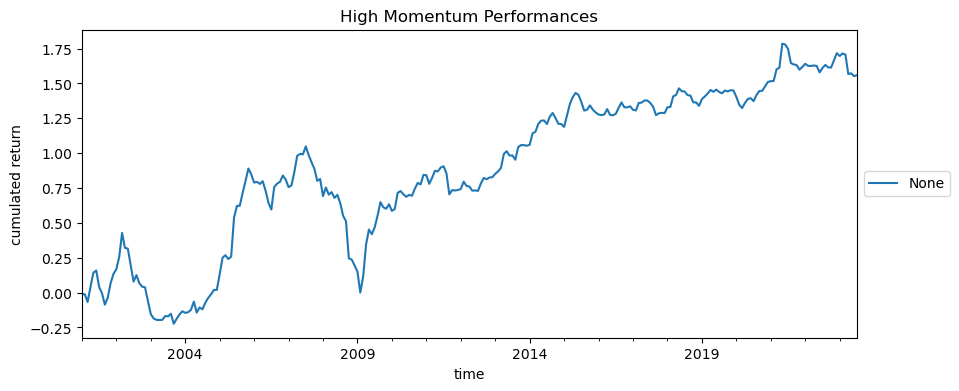

In [59]:
plt.rcdefaults()
momentum_stock.mean(axis = 1).cumsum().plot(figsize = (10,4))
plt.xlabel('time')
plt.ylabel('cumulated return')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title("High Momentum Performances")

Low Volatility

In [60]:
temp1 = data**2
temp2 = data.copy()
variance11 = sum([temp1.shift(i, axis = 0) for i in range(11)]) / 11 - ((sum([temp2.shift(i, axis = 0) for i in range(11)])/11) ** 2)
variance11

,005930,373220,000660,207940,005935,006400,051910,005380,005490,000270,...,078650,245450,288490,000995,322190,308700,010145,004565,000547,001745
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.008096,0.022516,0.008585,0.002774,0.008531,0.016459,0.017504,0.004909,0.016927,0.008175,...,0.000000,0.004279,0.048372,0.043753,0.128667,0.014280,0.047675,0.003713,0.014009,0.019690
2023-04-30,0.008160,0.022500,0.008623,0.002748,0.008594,0.016473,0.016706,0.005285,0.016878,0.008300,...,0.000000,0.004472,0.051359,0.056086,0.137096,0.016963,0.047675,0.004168,0.014460,0.020159
2023-05-31,0.005870,0.018353,0.009391,0.002362,0.006595,0.015594,0.015404,0.005011,0.011363,0.007266,...,0.000000,0.004171,0.051309,0.057326,0.139128,0.024595,0.048246,0.004064,0.012274,0.019481
2023-06-30,0.005581,0.018718,0.009261,0.001676,0.005953,0.016163,0.013964,0.004552,0.011458,0.007158,...,0.000000,0.005020,0.049083,0.123499,0.139241,0.024766,0.069498,0.075563,0.057159,0.063218


In [61]:
Idxs2 = pd.DataFrame()
for i in range(11, 282) :
    idx = pd.DataFrame(variance11.iloc[i].sort_values(axis = 0, ascending = False).dropna().index[-10:]).T
    Idxs2 = pd.concat([Idxs2, idx], axis = 0)

Idxs2.index = pd.date_range(start = '2001-01-01', end = '2023-08-01', freq = 'M')
Idxs2

,0,1,2,3,4,5,6,7,8,9
2001-01-31,033780,017940,009070,005850,003200,000860,004430,010955,000075,000670
2001-02-28,008775,004430,034300,000075,003300,003200,000860,005850,000215,000670
2001-03-31,003200,004430,004270,000075,004840,003300,000860,034300,000215,000670
2001-04-30,000075,033780,034300,004840,003300,008775,002220,000215,000860,000670
2001-05-31,006570,002810,004840,008775,002220,003300,007310,006125,000670,000860
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,106080,136510,099520,012600,141020,103230,223310,101680,078590,103660
2023-04-30,263540,208860,012600,269620,160600,299910,141020,007610,181340,121890
2023-05-31,136510,058220,007610,121890,160600,223310,181340,052770,033340,141020
2023-06-30,150840,030790,057880,178780,215090,052770,058220,150440,121890,033340


In [62]:
volatility_stock = pd.DataFrame()
for i in range(0, 283-12) :
    ret = pd.DataFrame(data[Idxs2.iloc[i]].iloc[i+12].values).T
    volatility_stock = pd.concat([volatility_stock, ret], axis = 0)
volatility_stock.index = pd.date_range(start = '2001-01-01', end = '2023-08-01', freq = 'M')
volatility_stock

,0,1,2,3,4,5,6,7,8,9
2001-01-31,-0.120088,-0.139610,0.048790,0.044700,-0.031032,-0.029708,-0.098080,-0.183442,0.090600,-0.054168
2001-02-28,0.095725,0.077515,0.040743,0.088865,-0.042974,0.070520,0.043059,0.109614,-0.062301,-0.009643
2001-03-31,-0.074827,-0.074641,-0.240486,-0.053007,0.032790,0.033960,-0.013351,0.082088,-0.054233,-0.007782
2001-04-30,0.076437,0.023218,0.349645,-0.022180,0.048062,0.112478,-0.019924,0.227001,-0.050539,0.005842
2001-05-31,0.110159,0.066669,0.023469,0.194851,0.077420,0.152763,0.147118,0.085861,0.028710,0.055009
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.597591,0.000000,0.000000,0.000000,0.000000,0.403467,0.000000,1.070441,0.000000,0.000000
2023-04-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-05-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.277704,0.000000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'volatility stock')

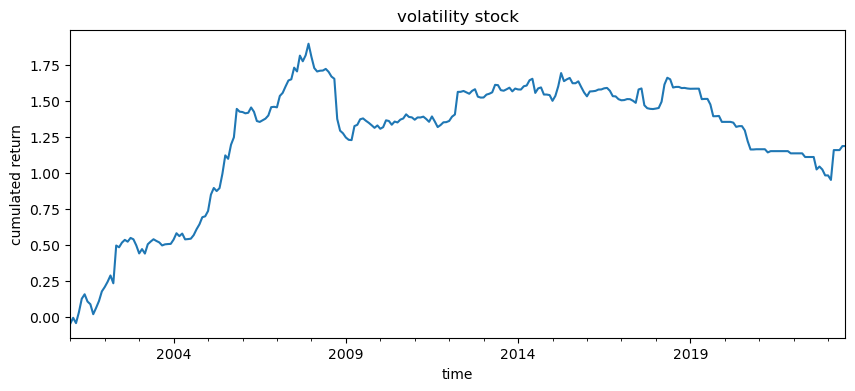

In [63]:
volatility_stock.mean(axis = 1).cumsum().plot(figsize = (10,4))
plt.xlabel('time')
plt.ylabel('cumulated return')
plt.title('volatility stock')

High beta

In [64]:
KOSPI = fdr.DataReader('^KS11', '2000')
KOSPI = KOSPI['Close'].resample('M').last()
KOSPI.index = pd.date_range(start = '2000-01-01', end = '2023-08-01', freq = 'M')
KOSPI = np.log(KOSPI) - np.log(KOSPI.shift())
KOSPI

2000-01-31         NaN
2000-02-29   -0.130527
2000-03-31    0.038553
2000-04-30   -0.171315
2000-05-31    0.008907
                ...   
2023-03-31    0.026183
2023-04-30    0.009911
2023-05-31    0.029770
2023-06-30   -0.004995
2023-07-31    0.015033
Freq: M, Name: Close, Length: 283, dtype: float64

In [65]:
#beta = pd.DataFrame()
#for i in data.columns :
    #beta_new = pd.Series()
    #for j in range(283 - 12) :
        #new = pd.Series(data[i].iloc[j:j+12].corr(KOSPI.iloc[j:j+12]) * (data[i].iloc[j:j+12].std() / KOSPI.iloc[j:j+12].std()))
        #beta_new = pd.concat([beta_new, new])
    #beta_new = pd.DataFrame(beta_new, columns = [i])
    #beta = pd.concat([beta, beta_new], axis = 1)
#beta.index = pd.date_range(start = '2001-01-01', end = '2023-08-01', freq = 'M')
#beta

In [66]:
# beta.to_csv('stockBeta6month.csv')

In [67]:
beta = pd.read_csv('stockBeta6month.csv', index_col = 0)

In [68]:
Idxs3 = pd.DataFrame()
for i in range(271) :
    idx = pd.DataFrame(abs(beta-1).iloc[i].sort_values(axis = 0, ascending = False).dropna().index[-10:]).T
    Idxs3 = pd.concat([Idxs3, idx], axis = 0)

Idxs3.index = pd.date_range(start = '2001-01-01', end = '2023-08-01', freq = 'M')
Idxs3

,0,1,2,3,4,5,6,7,8,9
2001-01-31,008830,038880,011780,017650,025900,037440,001525,001750,021080,002360
2001-02-28,005610,014440,030200,031860,009540,001040,030000,023440,003230,005490
2001-03-31,003460,023600,003490,014440,001550,025540,004410,018680,007570,011000
2001-04-30,009150,036120,018680,003240,004870,000970,037350,006380,011000,001040
2001-05-31,000180,033100,023790,032500,028050,012340,003460,034120,037950,000390
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,058820,071055,060590,264850,005030,099430,260660,007720,034940,023810
2023-04-30,014100,126560,129890,214450,003830,060590,012030,076610,092870,151910
2023-05-31,099220,060540,150900,335810,004430,010580,097870,080000,000157,060590
2023-06-30,059210,351320,090430,001470,246960,250930,331380,205470,073110,049470


In [69]:
beta_stock = pd.DataFrame()
for i in range(271) :
    ret = pd.DataFrame(data[Idxs3.iloc[i]].iloc[i+12].values).T
    beta_stock = pd.concat([beta_stock, ret], axis = 0)
beta_stock.index = pd.date_range(start = '2001-01-01', end = '2023-08-01', freq = 'M')
beta_stock

,0,1,2,3,4,5,6,7,8,9
2001-01-31,0.379560,0.814418,0.098206,0.702572,0.299107,0.125163,0.065379,0.625652,0.291687,0.561684
2001-02-28,0.077056,-0.022395,-0.143815,0.070611,0.018795,0.177134,0.193783,0.216921,0.108214,0.040410
2001-03-31,-0.259545,-0.007992,-0.281332,-0.151444,-0.185230,-0.118300,-0.157852,-0.182915,0.028387,-0.206690
2001-04-30,0.044179,0.054795,0.005810,-0.015666,-0.044788,0.056686,0.040037,-0.004402,0.105266,0.122571
2001-05-31,0.090972,0.175012,0.015937,-0.083307,0.199327,0.004393,0.082298,0.218002,0.077870,0.131140
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,-0.070452,-0.108492,0.071536,0.047110,-0.068186,-0.082391,-0.058496,-0.038732,-0.026609,0.104272
2023-04-30,-0.031698,0.025198,-0.117666,0.363772,-0.054022,0.014538,0.072114,0.050010,-0.104399,-0.204794
2023-05-31,0.055852,0.067857,-0.018112,0.053489,-0.050803,-0.092606,0.052947,0.139029,0.134919,0.056127
2023-06-30,0.200089,-0.021894,-0.068310,0.412773,0.072805,0.030529,0.050840,-0.122304,-0.059287,0.041215


Text(0.5, 1.0, 'Beta Stock')

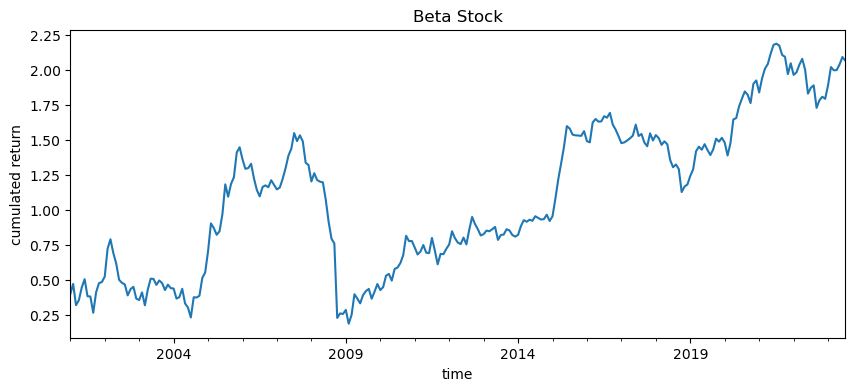

In [70]:
beta_stock.mean(axis = 1).cumsum().plot(figsize = (10,4))
plt.xlabel('time')
plt.ylabel('cumulated return')
plt.title('Beta Stock')

USD

In [71]:
USD = pd.read_excel('exchange.xlsx', index_col = 0).T.iloc[:,0].astype(float)
USD.index = pd.date_range(start = '2000-01-01', end = '2023-06-01', freq = 'M')
USD = np.log(USD) - np.log(USD.shift())
USD

2000-01-31         NaN
2000-02-29    0.006920
2000-03-31   -0.022352
2000-04-30    0.002799
2000-05-31    0.018138
                ...   
2023-01-31   -0.026119
2023-02-28    0.071042
2023-03-31   -0.015775
2023-04-30    0.027127
2023-05-31   -0.007880
Freq: M, Name: KRW/USD, Length: 281, dtype: float64

JPY

In [72]:
JPY = pd.read_excel('exchange.xlsx', index_col = 0).T.iloc[:,2].astype(float)
JPY.index = pd.date_range(start = '2000-01-01', end = '2023-06-01', freq = 'M')
JPY = np.log(JPY) - np.log(JPY.shift())
JPY

2000-01-31         NaN
2000-02-29   -0.014683
2000-03-31    0.012107
2000-04-30   -0.019969
2000-05-31    0.035417
                ...   
2023-01-31    0.000423
2023-02-28    0.025569
2023-03-31    0.009333
2023-04-30    0.009954
2023-05-31   -0.039479
Freq: M, Name: KRW/JPY, Length: 281, dtype: float64

Bond

In [73]:
bond = pd.read_excel('bond.xlsx', index_col = 0)
bond = bond.astype(float) * 0.01
bond = bond.resample('M').last() / 12
bond

,return
2000-01-31,0.007500
2000-02-29,0.007425
2000-03-31,0.007500
2000-04-30,0.007433
2000-05-31,0.007392
...,...
2023-03-31,0.002725
2023-04-30,0.002744
2023-05-31,0.002883
2023-06-30,0.003052


Text(0.5, 1.0, 'Bond Return')

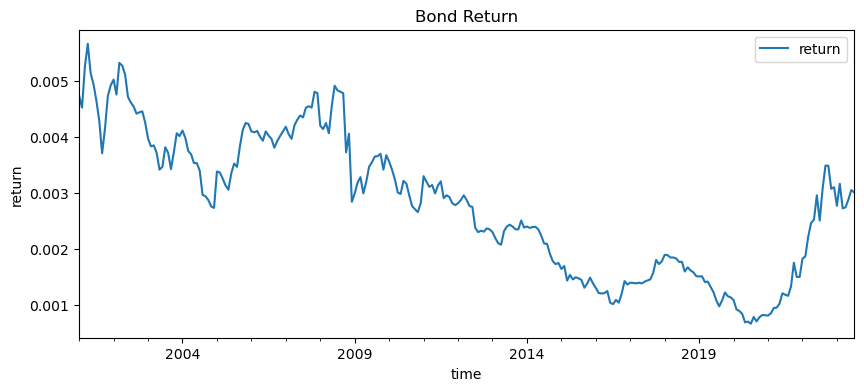

In [74]:
bond.iloc[12:].plot(figsize = (10,4))
plt.xlabel('time')
plt.ylabel('return')
plt.title('Bond Return')

Material

In [75]:
material = pd.read_excel('Material.xlsx', index_col = 0, header = 1)

In [76]:
material = material.iloc[480:]
material.index = pd.date_range(start = '2000-01-01', end = '2023-07-01', freq = 'M')
material

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
2000-01-31,25.310000,25.3800,23.2800,27.27,25.1,22.78,2.4200,3.360000,4.15,48.17191,...,1680.28,28.79,1843.98,472.10,5927.80,8309.50,1178.80,284.32,441.00,5.1882
2000-02-29,27.220967,27.7048,24.6771,29.281,25.1,23.62,2.6500,3.460000,4.21,51.480933,...,1670.27,28.79,1800.83,452.40,5642.10,9653.33,1094.90,299.86,519.71,5.2467
2000-03-31,27.490000,27.4700,25.0800,29.92,25.1,24.4,2.7900,3.510000,4.46,53.588077,...,1577.05,28.79,1739.39,441.30,5457.80,10280.11,1116.40,286.39,479.33,5.0649
2000-04-30,23.470000,22.5400,22.0300,25.84,25.1,24.94,3.0300,3.680000,4.64,57.432611,...,1457.14,28.79,1678.75,421.10,5384.40,9727.50,1127.60,279.69,497.55,5.0645
2000-05-31,27.186667,27.3400,25.3900,28.83,25.6,26.05,3.5800,3.550000,4.53,63.418925,...,1466.79,28.79,1785.62,412.10,5451.20,10130.24,1156.90,275.19,525.89,4.9796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,80.253333,82.7100,81.2100,76.84,207.48,144.67,2.3836,16.537137,18.41533,120.038315,...,2416.18,127.60,8936.59,2093.06,26862.90,26727.95,3133.84,1854.54,958.85,21.9210
2023-03-31,76.473333,78.5300,77.5200,73.37,187.23,136.84,2.3049,13.812077,16.033126,104.51384,...,2296.42,128.37,8856.31,2115.18,23999.96,23288.61,2967.46,1912.73,970.61,21.9760
2023-04-30,82.460000,84.1100,83.8300,79.44,194.28,133.7451,2.1611,13.520530,14.366063,100.25219,...,2343.23,117.39,8809.42,2149.43,25793.75,23894.56,2767.56,1999.77,1050.74,25.0100
2023-05-31,74.123333,75.7000,75.0800,71.59,160.48,103,2.1464,10.108756,13.430296,83.220229,...,2268.60,105.15,8217.47,2083.60,25533.80,21970.39,2475.70,1992.13,1062.73,24.2670


In [77]:
material = material.drop(['RAPESEED_OIL','SUNFLOWER_OIL','RICE_05_VNM','BARLEY','SORGHUM','WHEAT_US_SRW','RICE_25'], axis = 1)
material = material.astype(float)
material = np.log(material) - np.log(material.shift())
material

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,0.072788,0.087644,0.058281,0.071152,0.000000,0.036211,0.090792,0.029328,0.014354,0.066435,...,-0.005975,0.000000,-0.023679,-0.042624,-0.049397,0.149903,-0.073834,0.053215,0.164226,0.011212
2000-03-31,0.009835,-0.008511,0.016195,0.021588,0.000000,0.032489,0.051482,0.014347,0.057686,0.040115,...,-0.057429,0.000000,-0.034713,-0.024842,-0.033211,0.062908,0.019446,-0.045961,-0.080882,-0.035265
2000-04-30,-0.158099,-0.197803,-0.129666,-0.146603,0.000000,0.021890,0.082521,0.047297,0.039566,0.069286,...,-0.079080,0.000000,-0.035485,-0.046855,-0.013540,-0.055254,0.009982,-0.023673,0.037307,-0.000079
2000-05-31,0.147004,0.193059,0.141950,0.109493,0.019725,0.043545,0.166800,-0.035965,-0.023992,0.099150,...,0.006601,0.000000,0.061716,-0.021604,0.012330,0.040568,0.025653,-0.016220,0.055396,-0.016906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,-0.001950,-0.004584,0.014637,-0.016393,-0.426985,-0.173039,-0.317034,-0.199280,-0.092241,-0.218674,...,-0.034831,0.042996,-0.011278,-0.050403,-0.046948,-0.053421,-0.054632,-0.023011,-0.093901,-0.076045
2023-03-31,-0.048246,-0.051860,-0.046502,-0.046210,-0.102697,-0.055643,-0.033575,-0.180065,-0.138527,-0.138491,...,-0.050836,0.006016,-0.009024,0.010513,-0.112694,-0.137745,-0.054553,0.030895,0.012190,0.002506
2023-04-30,0.075371,0.068645,0.078255,0.079487,0.036963,-0.022877,-0.064420,-0.021334,-0.109788,-0.041631,...,0.020179,-0.089415,-0.005309,0.016063,0.072080,0.025686,-0.069740,0.044501,0.079325,0.129325
2023-05-31,-0.106583,-0.105347,-0.110237,-0.104047,-0.191131,-0.261207,-0.006825,-0.290807,-0.067356,-0.186198,...,-0.032367,-0.110114,-0.069559,-0.031106,-0.010129,-0.083955,-0.111443,-0.003828,0.011346,-0.030158


In [78]:
material.to_csv('material_ret.csv')

<AxesSubplot:>

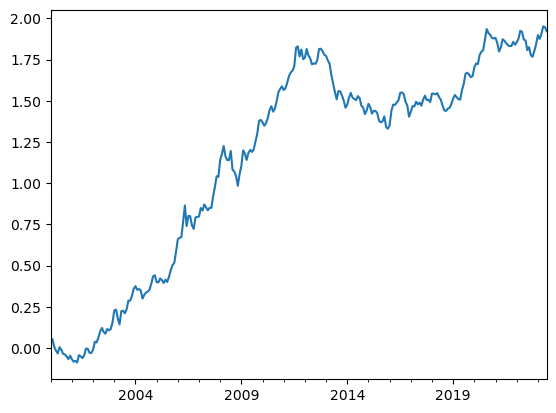

In [79]:
material['GOLD'].cumsum().plot()

<AxesSubplot:>

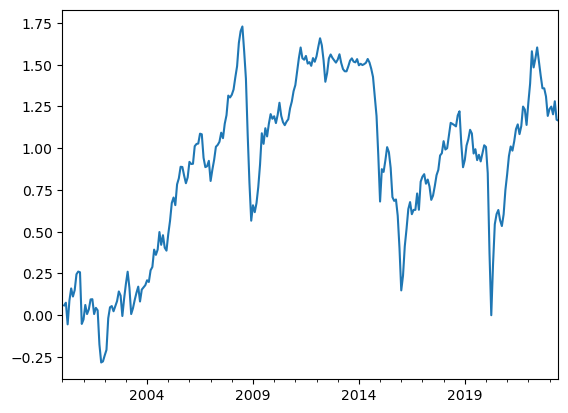

In [80]:
material['CRUDE_DUBAI'].cumsum().plot()

KOSPI200 future

In [81]:
fdr.DataReader('^KS200', '2000')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,130.080002,134.759995,128.300003,133.660004,133.660004,121300.0
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,126.650002,129.410004,123.550003,123.860001,123.860001,153300.0
2000-01-06,127.400002,127.540001,119.860001,120.800003,120.800003,117000.0
2000-01-07,119.180000,121.970001,116.660004,119.099998,119.099998,130600.0
...,...,...,...,...,...,...
2023-07-14,343.489990,346.929993,342.899994,346.929993,346.929993,155000.0
2023-07-17,345.380005,346.980011,344.739990,345.750000,345.750000,150900.0
2023-07-18,346.489990,346.980011,342.899994,343.380005,343.380005,131100.0


In [82]:
KS200 = fdr.DataReader('^KS200', '2000')
KS200 = KS200['Close'].resample('M').last()
KS200.index = pd.date_range(start = '2000-01-01', end = '2023-08-01', freq = 'M')
KS200 = np.log(KS200) - np.log(KS200.shift())
KS200 = KS200.iloc[12:]

<AxesSubplot:>

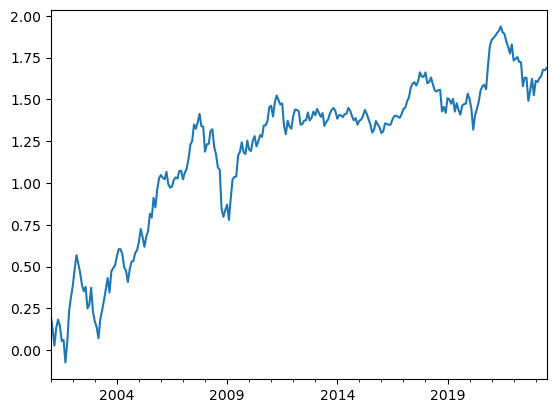

In [83]:
KS200.cumsum().plot()

DJI

In [84]:
DJI = fdr.DataReader('DJI', '2000')
DJI = DJI['Close'].resample('M').last()
DJI.index = pd.date_range(start = '2000-01-01', end = '2023-08-01', freq = 'M')
DJI = np.log(DJI) - np.log(DJI.shift())
DJI = DJI.iloc[12:]

In [85]:
DJI

2001-01-31    0.009169
2001-02-28   -0.036677
2001-03-31   -0.060537
2001-04-30    0.083118
2001-05-31    0.016351
                ...   
2023-03-31    0.018731
2023-04-30    0.024463
2023-05-31   -0.035519
2023-06-30    0.044554
2023-07-31    0.018818
Freq: M, Name: Close, Length: 271, dtype: float64

<AxesSubplot:>

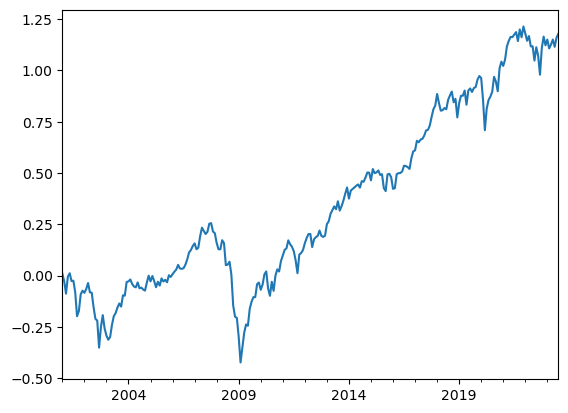

In [86]:
DJI.cumsum().plot()

Nikkei 225

In [87]:
stock_code = "^N225"
nikkei = yf.download(stock_code, start="2000-01-01", end="2023-06-01")
nikkei = nikkei['Close'].resample('M').last()
nikkei.index = pd.date_range(start = '2000-01-01', end = '2023-06-01', freq = 'M')
nikkei = np.log(nikkei) - np.log(nikkei.shift())
nikkei

[*********************100%***********************]  1 of 1 completed


2000-01-31         NaN
2000-02-29    0.021258
2000-03-31    0.018751
2000-04-30   -0.123548
2000-05-31   -0.095756
                ...   
2023-01-31    0.046155
2023-02-28    0.004325
2023-03-31    0.021480
2023-04-30    0.028648
2023-05-31    0.068031
Freq: M, Name: Close, Length: 281, dtype: float64

<AxesSubplot:>

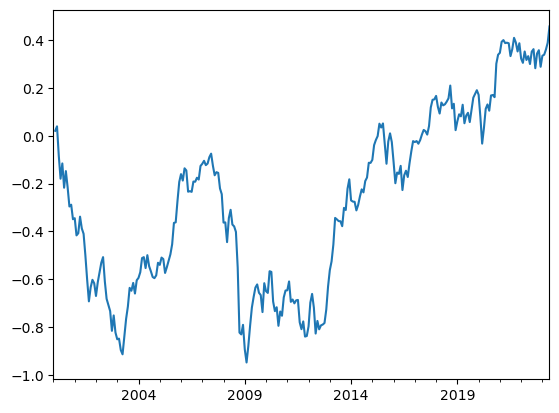

In [88]:
nikkei.cumsum().plot()

Text(0.5, 1.0, 'return of assets')

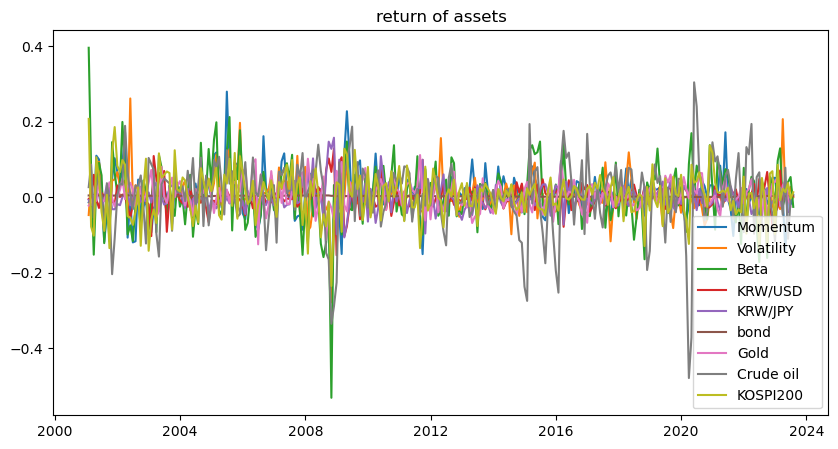

In [89]:
plt.figure(figsize = (10,5))
plt.plot(momentum_stock.mean(axis = 1), label = 'Momentum')
plt.plot(volatility_stock.mean(axis = 1), label = 'Volatility')
plt.plot(beta_stock.mean(axis = 1), label = 'Beta')
#plt.plot(KOSPI.iloc[12:], label = 'KOSPI')
plt.plot(USD.iloc[12:], label = 'KRW/USD')
plt.plot(JPY.iloc[12:], label = 'KRW/JPY')
plt.plot(bond.iloc[12:], label = 'bond')
plt.plot(material['GOLD'].iloc[12:], label = 'Gold')
plt.plot(material['CRUDE_DUBAI'].iloc[12:], label = 'Crude oil')
plt.plot(KS200, label = 'KOSPI200')
plt.legend()
plt.title('return of assets')

Text(0.5, 1.0, 'Cumulated return of assets')

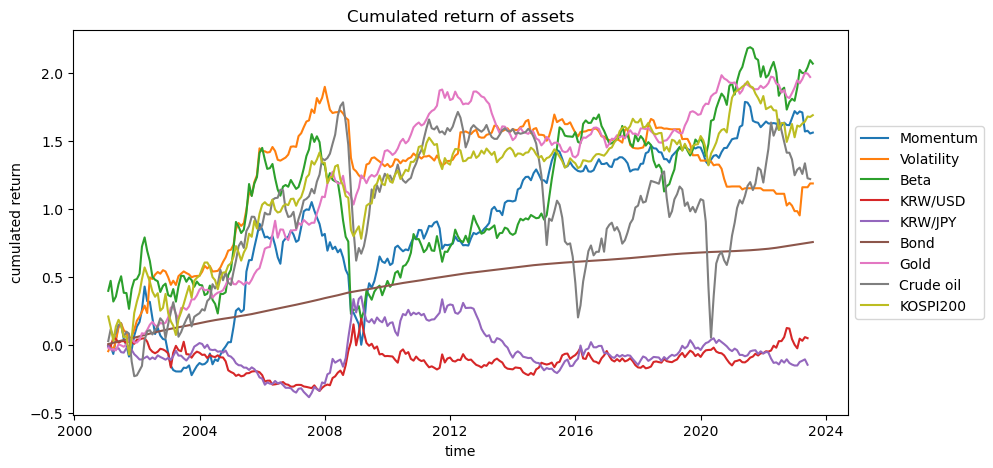

In [90]:
plt.figure(figsize = (10,5))
plt.plot(momentum_stock.mean(axis = 1).cumsum(), label = 'Momentum')
plt.plot(volatility_stock.mean(axis = 1).cumsum(), label = 'Volatility')
plt.plot(beta_stock.mean(axis = 1).cumsum(), label = 'Beta')
#plt.plot(KOSPI.iloc[12:].cumsum(), label = 'KOSPI')
plt.plot(USD.iloc[12:].cumsum(), label = 'KRW/USD')
plt.plot(JPY.iloc[12:].cumsum(), label = 'KRW/JPY')
plt.plot(bond.iloc[12:].cumsum(), label = 'Bond')
plt.plot(material['GOLD'].iloc[12:].cumsum(), label = 'Gold')
plt.plot(material['CRUDE_DUBAI'].iloc[12:].cumsum(), label = 'Crude oil')
plt.plot(KS200.cumsum(), label = 'KOSPI200')
plt.xlabel('time')
plt.ylabel('cumulated return')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Cumulated return of assets')

Train Set

In [91]:
matrix = pd.DataFrame()

In [92]:
y_train

2001-01-31    2.0
2001-02-28    1.0
2001-03-31    3.0
2001-04-30    3.0
2001-05-31    3.0
             ... 
2018-05-31    1.0
2018-06-30    1.0
2018-07-31    1.0
2018-08-31    1.0
2018-09-30    2.0
Freq: M, Name: label, Length: 213, dtype: float64

In [93]:
y_train

2001-01-31    2.0
2001-02-28    1.0
2001-03-31    3.0
2001-04-30    3.0
2001-05-31    3.0
             ... 
2018-05-31    1.0
2018-06-30    1.0
2018-07-31    1.0
2018-08-31    1.0
2018-09-30    2.0
Freq: M, Name: label, Length: 213, dtype: float64

In [94]:
matrix = pd.concat([momentum_stock.mean(axis = 1),
                    volatility_stock.mean(axis = 1),
                    beta_stock.mean(axis = 1),
                    USD.iloc[12:],
                    JPY.iloc[12:],
                    bond.iloc[12:],
                    material['GOLD'].iloc[12:],
                    material['SILVER'].iloc[12:],
                    material['CRUDE_DUBAI'].iloc[12:],
                    material['Zinc'].iloc[12:],
                    material['BANANA_US'].iloc[12:],
                    material['WHEAT_US_HRW'].iloc[12:],
                    material['RICE_05'].iloc[12:],
                    KS200, DJI, nikkei.iloc[12:],
                    y, pd.DataFrame(y_pred, index = pd.date_range(start = '2018-10-01', end = '2023-06-01', freq = 'M'))], axis = 1)

matrix.columns = ['Momentum','Volatility','Beta','USD','JPY','Bond','Gold','Silver','Crude','Zinc','BANANA','WHEAT','RICE','KOSPI200','Dow Jones','Nikkei','label','y_pred']
matrix

,Momentum,Volatility,Beta,USD,JPY,Bond,Gold,Silver,Crude,Zinc,BANANA,WHEAT,RICE,KOSPI200,Dow Jones,Nikkei,label,y_pred
2001-01-31,-0.013563,-0.047204,0.396343,-0.004359,-0.007015,0.004733,-0.022201,0.003722,0.026780,-0.025516,0.177187,0.036412,0.000814,0.207778,0.009169,0.004188,2.0,NaN
2001-02-28,0.002542,0.041112,0.073671,-0.006534,-0.020598,0.004525,-0.013729,-0.021641,0.086778,-0.011879,0.251098,-0.036256,0.000542,-0.077844,-0.036677,-0.071869,1.0,NaN
2001-03-31,-0.056530,-0.036949,-0.152291,0.059514,-0.017701,0.005258,0.004420,-0.034239,-0.054330,-0.015996,-0.239568,0.016182,-0.052863,-0.101763,-0.060537,0.008976,3.0,NaN
2001-04-30,0.110164,0.075004,0.036449,-0.005893,0.014149,0.005667,-0.009742,-0.008895,0.027728,-0.035767,0.018939,-0.004079,-0.066445,0.106051,0.083118,0.069429,3.0,NaN
2001-05-31,0.100168,0.094203,0.091164,-0.028437,0.005324,0.005142,0.044599,0.015526,0.059910,-0.032927,0.144085,0.039244,0.003536,0.049020,0.016351,-0.049442,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,-0.007987,0.207150,-0.023044,-0.015775,0.009333,0.002725,0.030895,0.002506,-0.046502,-0.054553,-0.035907,-0.065128,-0.033061,0.022707,0.018731,0.021480,3.0,0.0
2023-04-30,-0.139590,0.000000,0.001305,0.027127,0.009954,0.002744,0.044501,0.129325,0.078255,-0.069740,0.031749,0.022246,0.051188,0.013663,0.024463,0.028648,NaN,1.0
2023-05-31,0.005421,0.000000,0.039870,-0.007880,-0.039479,0.002883,-0.003828,-0.030158,-0.110237,-0.111443,-0.025318,-0.027994,0.017805,0.038047,-0.035519,0.068031,NaN,1.0
2023-06-30,-0.020245,0.027770,0.053646,NaN,NaN,0.003052,-0.025023,-0.035655,-0.005476,-0.041336,-0.012038,-0.062384,0.007813,-0.003456,0.044554,NaN,NaN,NaN


Text(0.5, 1.0, 'Asset Universe')

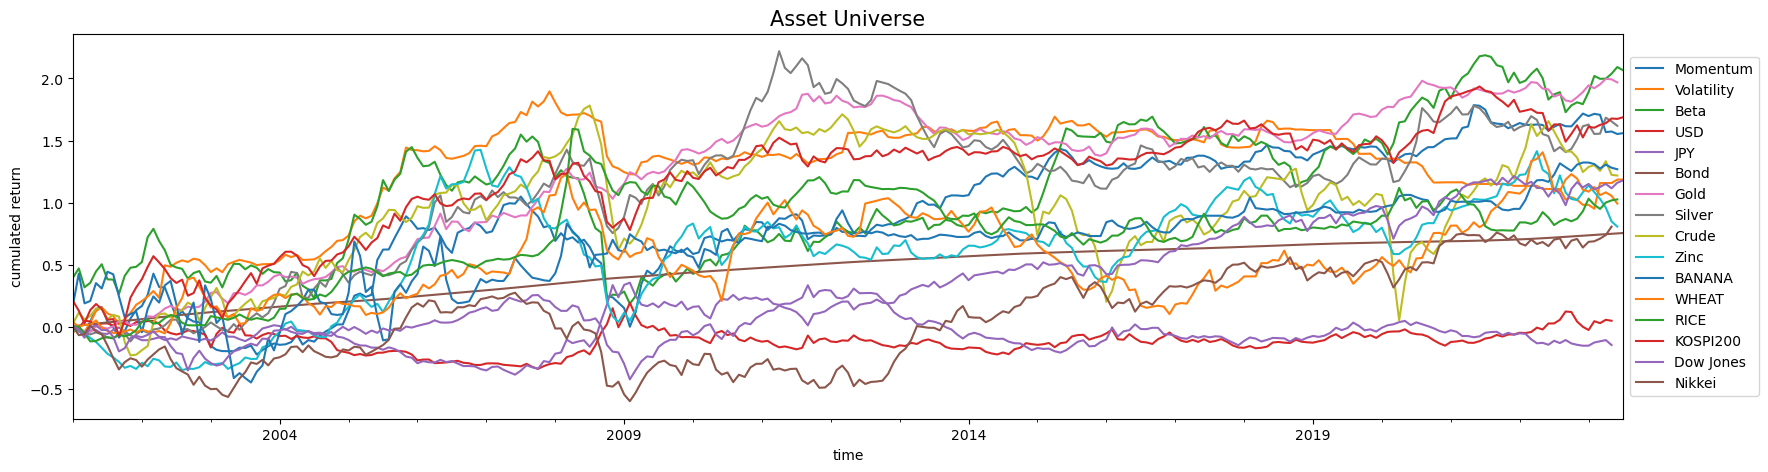

In [95]:
matrix.iloc[:,:-2].cumsum().plot(figsize = (20,5))
plt.xlabel('time')
plt.ylabel('cumulated return')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Asset Universe', fontsize = 15)

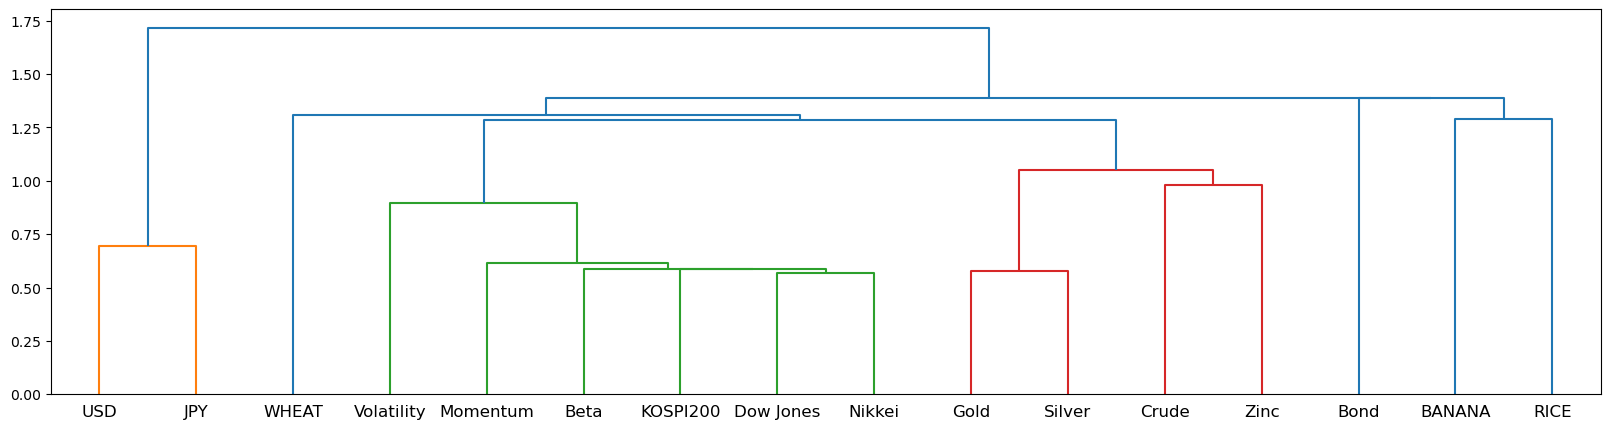

In [96]:
import scipy.cluster.hierarchy as sch

def correlDist(corr: np.ndarray) -> np.ndarray:
    dist = ((1 - corr) / 2.0) ** 0.5  # distance matrix
    return dist

corr = matrix.iloc[:,:-2].corr()
dist = correlDist(corr)
link = sch.linkage(corr, 'single')
fig, ax = plt.subplots(figsize=(20, 5))
sch.dendrogram(link, ax = ax, labels = matrix.iloc[:,:-2].columns)
plt.show()

/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_38516/3647951991.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortIx = sortIx.append(df0)  # item 2
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_38516/3647951991.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortIx = sortIx.append(df0)  # item 2
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_38516/3647951991.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortIx = sortIx.append(df0)  # item 2
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_38516/3647951991.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortIx = s

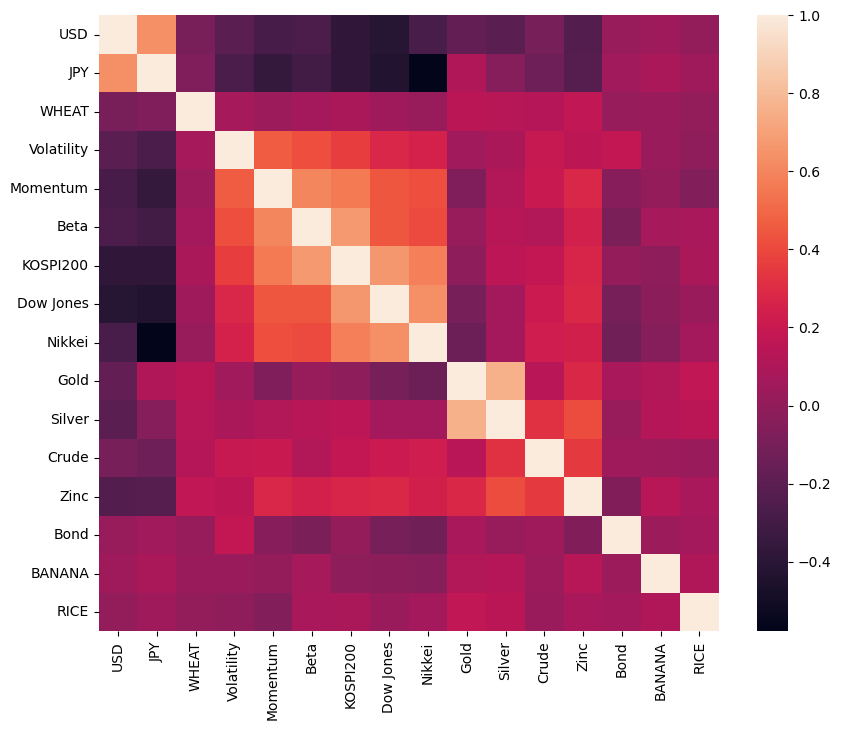

In [97]:
def getQuasiDiag(link: np.ndarray) -> list:
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    lst = sortIx.tolist()
    return lst

def plotCorrMatrix(corr: np.ndarray, labels: list = None, size: tuple = (9, 9)) -> None:
    fig, ax = plt.subplots(figsize=size)
    if labels is None:
        labels = []
    ax = sns.heatmap(corr)
    ax.set_yticks(np.arange(0.5, corr.shape[0] + 0.5), list(labels))
    ax.set_xticks(np.arange(0.5, corr.shape[0] + 0.5), list(labels))
    plt.show()

sortIx = getQuasiDiag(link)
sortIx = corr.index[sortIx].tolist()
df0 = corr.loc[sortIx, sortIx]
plotCorrMatrix(df0, labels = list(df0.columns), size = (10, 8))

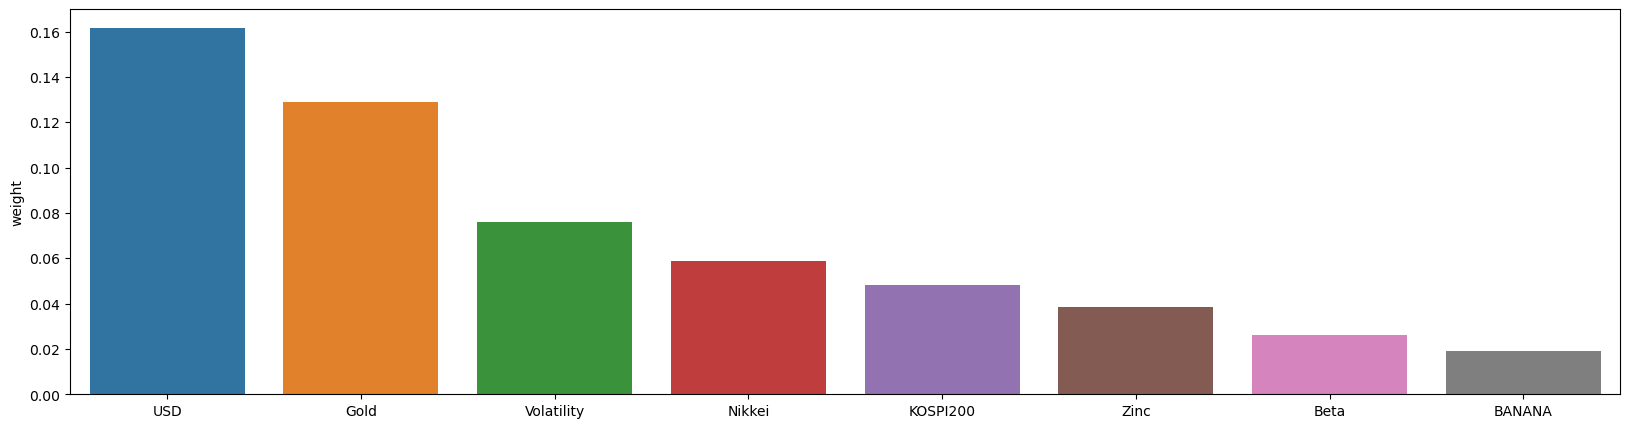

In [98]:
def getIvp(cov: np.ndarray, **kargs) -> np.ndarray:
    ivp = 1.0 / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

ivp = getIvp(matrix.iloc[:,:-1].drop(['Bond'], axis = 1).cov())
ivp_df = pd.DataFrame(data=sorted(ivp)[::-2], index = matrix.iloc[:,:-2].drop(['Bond'], axis = 1).columns[ivp.argsort()[::-2]], columns=['weight'])
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.barplot(x=ivp_df.index, y=ivp_df['weight'])
plt.show()

### 수익률 확인

In [99]:
matrix.iloc[:213,:]

,Momentum,Volatility,Beta,USD,JPY,Bond,Gold,Silver,Crude,Zinc,BANANA,WHEAT,RICE,KOSPI200,Dow Jones,Nikkei,label,y_pred
2001-01-31,-0.013563,-0.047204,0.396343,-0.004359,-0.007015,0.004733,-0.022201,0.003722,0.026780,-0.025516,0.177187,0.036412,0.000814,0.207778,0.009169,0.004188,2.0,NaN
2001-02-28,0.002542,0.041112,0.073671,-0.006534,-0.020598,0.004525,-0.013729,-0.021641,0.086778,-0.011879,0.251098,-0.036256,0.000542,-0.077844,-0.036677,-0.071869,1.0,NaN
2001-03-31,-0.056530,-0.036949,-0.152291,0.059514,-0.017701,0.005258,0.004420,-0.034239,-0.054330,-0.015996,-0.239568,0.016182,-0.052863,-0.101763,-0.060537,0.008976,3.0,NaN
2001-04-30,0.110164,0.075004,0.036449,-0.005893,0.014149,0.005667,-0.009742,-0.008895,0.027728,-0.035767,0.018939,-0.004079,-0.066445,0.106051,0.083118,0.069429,3.0,NaN
2001-05-31,0.100168,0.094203,0.091164,-0.028437,0.005324,0.005142,0.044599,0.015526,0.059910,-0.032927,0.144085,0.039244,0.003536,0.049020,0.016351,-0.049442,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-31,0.047399,0.047313,-0.021380,0.009041,0.013200,0.001829,-0.023737,-0.009536,0.073649,-0.041037,-0.005970,0.000000,0.000000,-0.039849,0.010403,-0.011912,1.0,NaN
2018-06-30,-0.020270,-0.010794,-0.112717,0.033577,0.015811,0.001768,-0.016929,0.003088,-0.005991,0.009336,0.005970,0.025447,-0.054683,-0.036887,-0.005933,0.004615,1.0,NaN
2018-07-31,-0.002226,-0.056994,-0.051116,0.003761,-0.002286,0.001769,-0.034823,-0.050718,-0.006852,-0.150838,-0.018019,-0.005038,-0.070332,-0.007402,0.046048,0.011111,1.0,NaN
2018-08-31,-0.025809,0.004097,0.019708,-0.005198,-0.001893,0.001597,-0.029517,-0.047941,-0.008146,-0.055791,-0.024541,0.080819,0.017435,0.008770,0.021396,0.013714,1.0,NaN


In [100]:
matrix.iloc[:213,:-2][matrix.iloc[:213,:]['label'] == 0].mean() # expansion

Momentum     -0.025161
Volatility   -0.020652
Beta         -0.058275
USD           0.019288
JPY           0.023415
Bond          0.003741
Gold         -0.002833
Silver       -0.021263
Crude        -0.014465
Zinc         -0.044627
BANANA       -0.022888
WHEAT        -0.063620
RICE          0.008539
KOSPI200     -0.035392
Dow Jones    -0.021021
Nikkei       -0.044998
dtype: float64

In [101]:
matrix.iloc[:213,:-2][matrix.iloc[:213,:]['label'] == 1].mean() # peak

Momentum      0.006386
Volatility    0.011168
Beta          0.004950
USD          -0.003668
JPY          -0.002983
Bond          0.003193
Gold          0.010449
Silver        0.011123
Crude         0.017027
Zinc          0.012251
BANANA        0.011096
WHEAT         0.015634
RICE          0.008133
KOSPI200      0.009044
Dow Jones     0.007387
Nikkei        0.006709
dtype: float64

In [102]:
matrix.iloc[:213,:-2][matrix.iloc[:213,:]['label'] == 2].mean() # contraction

Momentum      0.020137
Volatility    0.008599
Beta          0.029575
USD          -0.001176
JPY          -0.003210
Bond          0.002484
Gold          0.000638
Silver       -0.000907
Crude        -0.002408
Zinc          0.006923
BANANA       -0.005392
WHEAT        -0.005187
RICE         -0.003193
KOSPI200      0.019043
Dow Jones     0.008801
Nikkei        0.010520
dtype: float64

In [103]:
matrix.iloc[:213,:-2][matrix.iloc[:213,:]['label'] == 3].mean() # recession

Momentum     -0.021812
Volatility   -0.002389
Beta         -0.017794
USD           0.011441
JPY           0.008928
Bond          0.004448
Gold          0.016080
Silver        0.009162
Crude        -0.063757
Zinc         -0.049223
BANANA        0.018122
WHEAT        -0.020799
RICE         -0.023311
KOSPI200     -0.018577
Dow Jones    -0.026522
Nikkei       -0.022971
dtype: float64

In [104]:
target = pd.concat([
    matrix.iloc[:213,:-2][matrix.iloc[:213,:]['label'] == 0].mean(),
    matrix.iloc[:213,:-2][matrix.iloc[:213,:]['label'] == 1].mean(),
    matrix.iloc[:213,:-2][matrix.iloc[:213,:]['label'] == 2].mean(),
    matrix.iloc[:213,:-2][matrix.iloc[:213,:]['label'] == 3].mean()],
    axis = 1)
target

,0,1,2,3
Momentum,-0.025161,0.006386,0.020137,-0.021812
Volatility,-0.020652,0.011168,0.008599,-0.002389
Beta,-0.058275,0.004950,0.029575,-0.017794
USD,0.019288,-0.003668,-0.001176,0.011441
JPY,0.023415,-0.002983,-0.003210,0.008928
Bond,0.003741,0.003193,0.002484,0.004448
Gold,-0.002833,0.010449,0.000638,0.016080
Silver,-0.021263,0.011123,-0.000907,0.009162
Crude,-0.014465,0.017027,-0.002408,-0.063757
Zinc,-0.044627,0.012251,0.006923,-0.049223


### Dynamic Investing

In [105]:
matrix

,Momentum,Volatility,Beta,USD,JPY,Bond,Gold,Silver,Crude,Zinc,BANANA,WHEAT,RICE,KOSPI200,Dow Jones,Nikkei,label,y_pred
2001-01-31,-0.013563,-0.047204,0.396343,-0.004359,-0.007015,0.004733,-0.022201,0.003722,0.026780,-0.025516,0.177187,0.036412,0.000814,0.207778,0.009169,0.004188,2.0,NaN
2001-02-28,0.002542,0.041112,0.073671,-0.006534,-0.020598,0.004525,-0.013729,-0.021641,0.086778,-0.011879,0.251098,-0.036256,0.000542,-0.077844,-0.036677,-0.071869,1.0,NaN
2001-03-31,-0.056530,-0.036949,-0.152291,0.059514,-0.017701,0.005258,0.004420,-0.034239,-0.054330,-0.015996,-0.239568,0.016182,-0.052863,-0.101763,-0.060537,0.008976,3.0,NaN
2001-04-30,0.110164,0.075004,0.036449,-0.005893,0.014149,0.005667,-0.009742,-0.008895,0.027728,-0.035767,0.018939,-0.004079,-0.066445,0.106051,0.083118,0.069429,3.0,NaN
2001-05-31,0.100168,0.094203,0.091164,-0.028437,0.005324,0.005142,0.044599,0.015526,0.059910,-0.032927,0.144085,0.039244,0.003536,0.049020,0.016351,-0.049442,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,-0.007987,0.207150,-0.023044,-0.015775,0.009333,0.002725,0.030895,0.002506,-0.046502,-0.054553,-0.035907,-0.065128,-0.033061,0.022707,0.018731,0.021480,3.0,0.0
2023-04-30,-0.139590,0.000000,0.001305,0.027127,0.009954,0.002744,0.044501,0.129325,0.078255,-0.069740,0.031749,0.022246,0.051188,0.013663,0.024463,0.028648,NaN,1.0
2023-05-31,0.005421,0.000000,0.039870,-0.007880,-0.039479,0.002883,-0.003828,-0.030158,-0.110237,-0.111443,-0.025318,-0.027994,0.017805,0.038047,-0.035519,0.068031,NaN,1.0
2023-06-30,-0.020245,0.027770,0.053646,NaN,NaN,0.003052,-0.025023,-0.035655,-0.005476,-0.041336,-0.012038,-0.062384,0.007813,-0.003456,0.044554,NaN,NaN,NaN


In [106]:
from scipy.optimize import minimize
def blackLittermanOptimization(expected_returns : np.ndarray,
                               cov_matrix : pd.DataFrame,
                               target_return : float,
                               risk_free_rate : float) -> pd.Series :
    n = len(expected_returns)
    x0 = np.ones(n) / n
    cons = {'type': 'eq', 'fun': lambda x : np.sum(x) - 1}
    cons2 = {'type': 'eq', 'fun': lambda x : np.dot(expected_returns, x) - target_return}
    result = minimize(lambda x: -np.dot(x, expected_returns), x0, constraints = [cons, cons2],
                      bounds=[(0, 1) for _ in range(n)])

    return pd.Series(result.x, name = 'weight')

weights = pd.DataFrame()
for i in range(56) :
    expected_returns = target[matrix.iloc[213:-2].y_pred.iloc[i]]
    cov_matrix = matrix.iloc[213+i-12:213+i,:-2].cov()

    target_return = (target.mean().loc[matrix.iloc[213:-2].y_pred.iloc[i]] + 0.1)/12
    risk_free_rate = 0.03/12

    optimal_weights = blackLittermanOptimization(expected_returns, cov_matrix, target_return, risk_free_rate)
    weights = pd.concat([weights, optimal_weights], axis = 1)
weights = weights.T
weights.index = pd.date_range(start = '2018-10-01', end = '2023-06-01', freq = 'M')
weights.columns = matrix.iloc[:,:-2].columns
weights

,Momentum,Volatility,Beta,USD,JPY,Bond,Gold,Silver,Crude,Zinc,BANANA,WHEAT,RICE,KOSPI200,Dow Jones,Nikkei
2018-10-31,0.059188,0.069041,0.056229,0.038472,0.039882,0.052609,0.067559,0.068948,0.081112,7.127103e-02,0.068892,0.078242,0.062787,6.466467e-02,6.124988e-02,0.059853
2018-11-30,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2018-12-31,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-01-31,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-02-28,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-03-31,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-04-30,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-05-31,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-06-30,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-07-31,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766


<AxesSubplot:>

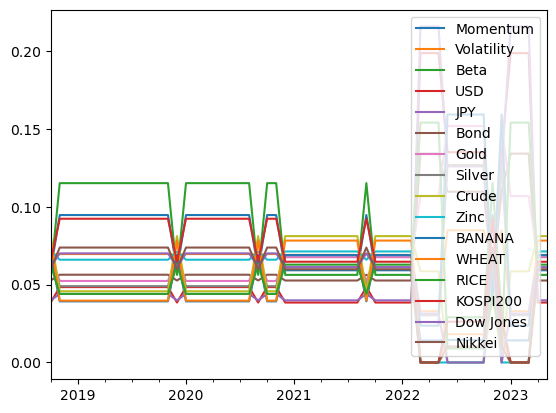

In [107]:
weights.plot()

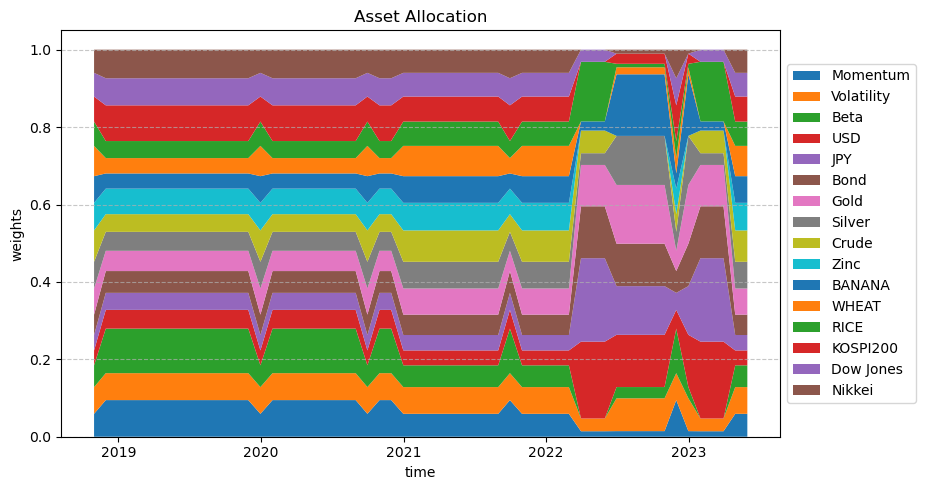

In [108]:
plt.figure(figsize=(8, 5))
plt.stackplot(weights.index, [weights[asset] for asset in weights.columns], baseline = 'zero', labels = weights.columns)

plt.xlabel('time')
plt.ylabel('weights')
plt.title('Asset Allocation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [109]:
weights

,Momentum,Volatility,Beta,USD,JPY,Bond,Gold,Silver,Crude,Zinc,BANANA,WHEAT,RICE,KOSPI200,Dow Jones,Nikkei
2018-10-31,0.059188,0.069041,0.056229,0.038472,0.039882,0.052609,0.067559,0.068948,0.081112,7.127103e-02,0.068892,0.078242,0.062787,6.466467e-02,6.124988e-02,0.059853
2018-11-30,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2018-12-31,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-01-31,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-02-28,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-03-31,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-04-30,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-05-31,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-06-30,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766
2019-07-31,0.094633,0.069598,0.115112,0.048387,0.043974,0.056329,0.052323,0.048972,0.045715,6.596041e-02,0.039239,0.039685,0.044011,9.226023e-02,7.003533e-02,0.073766


In [110]:
profit = matrix.iloc[213:-2,:].iloc[:,:-2] * weights
profit

,Momentum,Volatility,Beta,USD,JPY,Bond,Gold,Silver,Crude,Zinc,BANANA,WHEAT,RICE,KOSPI200,Dow Jones,Nikkei
2018-10-31,-0.002873,-0.000553,-0.009248,0.001037,0.001158,0.000085,0.000952,0.001552,0.002018,6.673586e-03,0.000637,0.000405,0.000617,-8.373690e-03,-3.189574e-03,-0.005723
2018-11-30,-0.000043,0.000080,0.004513,-0.000788,-0.000780,0.000089,0.000226,-0.000826,-0.008817,-1.952407e-03,0.000000,-0.001888,-0.000869,2.530007e-03,1.168894e-03,0.001435
2018-12-31,-0.002323,-0.000280,0.001716,-0.000238,0.000885,0.000085,0.001260,0.001409,-0.006508,5.214109e-04,0.000240,0.001476,0.000328,-3.242146e-03,-6.342003e-03,-0.008144
2019-01-31,0.004563,-0.000141,0.007060,-0.000130,0.000610,0.000085,0.001702,0.002746,0.001973,-1.185185e-03,0.000239,-0.000277,0.000649,8.057913e-03,4.848642e-03,0.002745
2019-02-28,0.001778,0.000052,0.005400,0.000519,-0.000324,0.000085,0.001135,0.000595,0.003978,3.437991e-03,0.000707,0.001701,-0.000215,-6.769550e-04,2.521126e-03,0.002141
2019-03-31,0.002042,0.000000,0.014866,0.000445,0.000431,0.000079,-0.000765,-0.001634,0.001729,3.404765e-03,0.000695,-0.002473,-0.000216,-2.410870e-03,3.425718e-05,-0.000621
2019-04-30,0.002414,0.000000,0.003818,0.001391,0.000988,0.000080,-0.000606,-0.000778,0.002568,1.871756e-03,-0.000462,-0.001223,0.000752,2.774261e-03,1.771541e-03,0.003575
2019-05-31,-0.001265,-0.005059,-0.002514,0.000931,0.001827,0.000074,-0.000090,-0.001295,-0.001001,-4.414302e-03,-0.001418,0.000000,-0.000428,-7.074153e-03,-4.846078e-03,-0.005708
2019-06-30,0.001489,0.000112,0.004541,-0.001494,-0.000857,0.000069,0.002984,0.001234,-0.005495,-3.496059e-03,0.000120,0.001294,0.001168,4.639631e-03,4.864645e-03,0.002377
2019-07-31,-0.001535,0.000000,-0.004862,0.001176,0.000732,0.000061,0.002033,0.002399,0.001185,-4.044564e-03,0.000000,-0.001957,-0.000421,-3.787030e-03,6.924664e-04,0.000847


### Performances

In [120]:
tiger = fdr.DataReader('102110', '2018')
tiger = tiger['Close'].resample('M').last()
tiger.index = pd.date_range(start = '2018-01-01', end = '2023-08-01', freq = 'M')
tiger = np.log(tiger) - np.log(tiger.shift())
tiger = tiger.iloc[9:]
tiger

2018-10-31   -0.129762
2018-11-30    0.029612
2018-12-31   -0.021510
2019-01-31    0.088613
2019-02-28   -0.005603
2019-03-31   -0.022140
2019-04-30    0.026325
2019-05-31   -0.078371
2019-06-30    0.055188
2019-07-31   -0.040418
2019-08-31   -0.029382
2019-09-30    0.057250
2019-10-31    0.010391
2019-11-30    0.002591
2019-12-31    0.072609
2020-01-31   -0.029825
2020-02-29   -0.059745
2020-03-31   -0.118835
2020-04-30    0.083446
2020-05-31    0.036186
2020-06-30    0.047425
2020-07-31    0.066512
2020-08-31    0.025864
2020-09-30    0.009859
2020-10-31   -0.025431
2020-11-30    0.138695
2020-12-31    0.131281
2021-01-31    0.040690
2021-02-28    0.013678
2021-03-31    0.011861
2021-04-30    0.017791
2021-05-31    0.011394
2021-06-30    0.026196
2021-07-31   -0.031410
2021-08-31   -0.011082
2021-09-30   -0.042901
2021-10-31   -0.032143
2021-11-30   -0.037174
2021-12-31    0.063601
2022-01-31   -0.093303
2022-02-28    0.009451
2022-03-31    0.013593
2022-04-30   -0.029213
2022-05-31 

In [130]:
tigerECO = fdr.DataReader('237440', '2018')
tigerECO = tigerECO['Close'].resample('M').last()
tigerECO.index = pd.date_range(start = '2018-01-01', end = '2023-08-01', freq = 'M')
tigerECO = np.log(tigerECO) - np.log(tigerECO.shift())
tigerECO = tigerECO.iloc[9:]
tigerECO

2018-10-31   -0.099449
2018-11-30    0.026849
2018-12-31    0.007229
2019-01-31   -0.000546
2019-02-28    0.003270
2019-03-31   -0.011604
2019-04-30    0.007787
2019-05-31   -0.022540
2019-06-30    0.009453
2019-07-31   -0.019787
2019-08-31   -0.009073
2019-09-30    0.009638
2019-10-31    0.013895
2019-11-30   -0.002563
2019-12-31    0.013410
2020-01-31   -0.012963
2020-02-29   -0.016869
2020-03-31    0.002831
2020-04-30    0.034350
2020-05-31    0.007403
2020-06-30    0.025912
2020-07-31    0.005061
2020-08-31    0.010149
2020-09-30   -0.013626
2020-10-31   -0.014135
2020-11-30    0.042845
2020-12-31    0.019195
2021-01-31   -0.013877
2021-02-28   -0.010561
2021-03-31    0.009643
2021-04-30   -0.005528
2021-05-31    0.013055
2021-06-30   -0.001014
2021-07-31   -0.011528
2021-08-31    0.004505
2021-09-30   -0.013575
2021-10-31   -0.034016
2021-11-30   -0.006233
2021-12-31    0.009975
2022-01-31   -0.048209
2022-02-28    0.016329
2022-03-31    0.002201
2022-04-30    0.001538
2022-05-31 

In [135]:
kodex = fdr.DataReader('237370', '2018')
kodex = kodex['Close'].resample('M').last()
kodex.index = pd.date_range(start = '2018-01-01', end = '2023-08-01', freq = 'M')
kodex = np.log(kodex) - np.log(kodex.shift())
kodex = kodex.iloc[9:]
kodex

2018-10-31   -0.040340
2018-11-30    0.018776
2018-12-31    0.002806
2019-01-31    0.017430
2019-02-28    0.008791
2019-03-31   -0.000471
2019-04-30    0.007878
2019-05-31   -0.018860
2019-06-30    0.014178
2019-07-31   -0.013702
2019-08-31   -0.009080
2019-09-30    0.002876
2019-10-31   -0.004798
2019-11-30    0.004798
2019-12-31    0.015202
2020-01-31   -0.019039
2020-02-29   -0.014521
2020-03-31   -0.036241
2020-04-30    0.044496
2020-05-31    0.019158
2020-06-30   -0.009533
2020-07-31    0.017565
2020-08-31    0.024635
2020-09-30    0.001376
2020-10-31    0.001375
2020-11-30    0.027547
2020-12-31    0.022898
2021-01-31    0.015980
2021-02-28    0.005128
2021-03-31    0.005102
2021-04-30    0.022642
2021-05-31   -0.001660
2021-06-30    0.002074
2021-07-31    0.008254
2021-08-31   -0.002881
2021-09-30    0.002470
2021-10-31   -0.017002
2021-11-30   -0.020280
2021-12-31    0.028609
2022-01-31   -0.022652
2022-02-28    0.005078
2022-03-31    0.005473
2022-04-30   -0.001681
2022-05-31 

Text(0, 0.5, 'return')

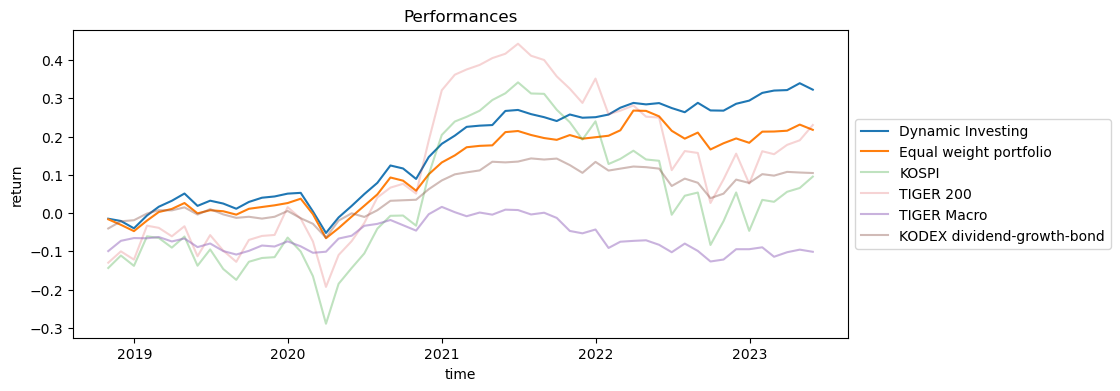

In [139]:
plt.figure(figsize = (10,4))
plt.plot(profit.sum(axis = 1).cumsum(), label = 'Dynamic Investing')
plt.plot(matrix.iloc[213:-2,:].iloc[:,:-2].mean(axis = 1).cumsum(), label = 'Equal weight portfolio')
plt.plot(KOSPI.iloc[225:-2].cumsum(), label = 'KOSPI', alpha = 0.3)
plt.plot(tiger.iloc[:-2].cumsum(), label = 'TIGER 200', alpha = 0.2)
plt.plot(tigerECO.iloc[:-2].cumsum(), label = 'TIGER Macro', alpha = 0.5)
plt.plot(kodex.iloc[:-2].cumsum(), label = 'KODEX dividend-growth-bond', alpha = 0.4)

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Performances')
plt.xlabel('time')
plt.ylabel('return')

### Underwater Plot

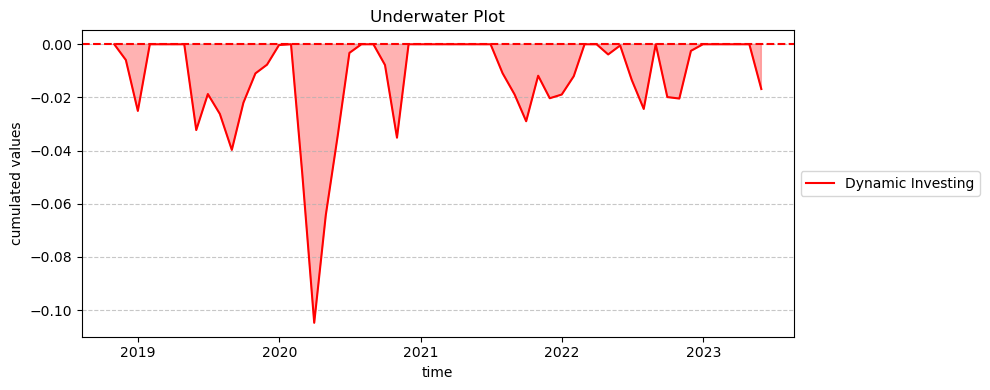

In [112]:
investment = 0
underwater = profit.sum(axis = 1).cumsum() - profit.sum(axis = 1).cumsum().cummax()

plt.figure(figsize = (10, 4))
plt.plot(underwater, label = 'Dynamic Investing', color = 'red')
plt.axhline(y = investment, linestyle = '--', color = 'red')
plt.fill_between(underwater.index, underwater, where = (underwater < investment),
                 interpolate = True, color = 'red', alpha = 0.3)

plt.xlabel('time')
plt.ylabel('cumulated values')
plt.title('Underwater Plot')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

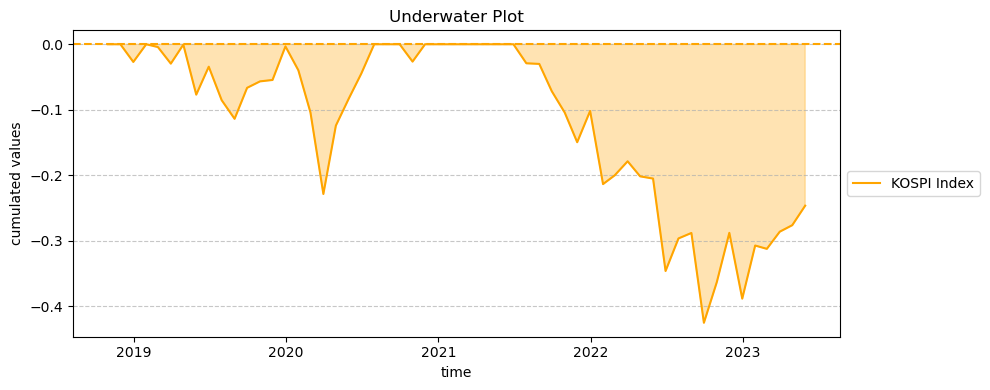

In [113]:
underwater_kospi = KOSPI.iloc[225:-2].cumsum() - KOSPI.iloc[225:-2].cumsum().cummax()
plt.figure(figsize = (10, 4))
plt.plot(underwater_kospi, label = 'KOSPI Index', color = 'orange')
plt.fill_between(underwater_kospi.index, underwater_kospi, where = (underwater_kospi < investment),
                 interpolate = True, color = 'orange', alpha = 0.3)
plt.axhline(y = investment, linestyle = '--', color = 'orange')

plt.xlabel('time')
plt.ylabel('cumulated values')
plt.title('Underwater Plot')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [114]:
profit.sum(axis = 1).cumsum()

2018-10-31   -0.014826
2018-11-30   -0.020748
2018-12-31   -0.039905
2019-01-31   -0.006359
2019-02-28    0.016474
2019-03-31    0.032079
2019-04-30    0.051013
2019-05-31    0.018731
2019-06-30    0.032282
2019-07-31    0.024800
2019-08-31    0.011270
2019-09-30    0.029044
2019-10-31    0.040052
2019-11-30    0.043330
2019-12-31    0.050723
2020-01-31    0.052759
2020-02-29    0.004266
2020-03-31   -0.052026
2020-04-30   -0.011454
2020-05-31    0.018597
2020-06-30    0.049515
2020-07-31    0.078860
2020-08-31    0.124277
2020-09-30    0.116471
2020-10-31    0.089135
2020-11-30    0.146269
2020-12-31    0.180923
2021-01-31    0.202323
2021-02-28    0.225215
2021-03-31    0.228341
2021-04-30    0.229917
2021-05-31    0.266807
2021-06-30    0.269374
2021-07-31    0.258478
2021-08-31    0.250500
2021-09-30    0.240410
2021-10-31    0.257530
2021-11-30    0.249066
2021-12-31    0.250462
2022-01-31    0.257339
2022-02-28    0.275248
2022-03-31    0.287761
2022-04-30    0.283928
2022-05-31 

In [115]:
expected_return = profit.sum(axis = 1).mean() * 12
risk = profit.sum(axis = 1).std()
risk_free_rate = 0.035
sharpe_ratio = (expected_return - risk_free_rate) / risk
def calculateCAGR(future_value, present_value, num_years):
    cagr = (future_value / present_value) ** (1 / num_years) - 1
    return cagr
cagr = calculateCAGR(13223.82, 10000, 4 + 2/3)

print("Expected Return: %.4f" % expected_return)
print("Risk (Standard Deviation): %.4f" % risk)
print("Sharpe Ratio: %.4f" % sharpe_ratio)
print("Max MDD: %.4f" % underwater.min())
print("CAGR: %.4f" % cagr)

Expected Return: 0.0691
Risk (Standard Deviation): 0.0219
Sharpe Ratio: 1.5527
Max MDD: -0.1048
CAGR: 0.0617
